In [170]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats

# Matplotlib.dates provides date plotting capabilities
import matplotlib.dates as mdates

In [171]:
#Read in the CSV
data = 'owid-covid-data.csv'

covid_data = pd.read_csv(data)

covid_data.head()

iso_code continent     location        date  total_cases  new_cases  \
0       AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
..      ...       ...          ...         ...          ...        ...   

    new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                  NaN           NaN         NaN                  NaN  ...   
..                 ...           ...         ...                  ...  ...   

    female_smokers  male_smokers  handwashing_facilities  \
0              NaN           NaN                  37.746   
..             ...           ...                     ...   

    hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                          0.5            64.83                    0.511   
..                         ...              ...                      ...   

    excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                    NaN                          NaN   
..                                   ...                          ...   

    excess_mortality  excess_mortality_cumulative_per_million  
0                NaN                                      NaN  
..               ...                                      ...  

[5 rows x 67 columns]

In [172]:
covid_data.keys()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [173]:
#Drop rows with no data
Covid_Data_Drop = covid_data[['location','gdp_per_capita', 'hospital_beds_per_thousand', 'life_expectancy', 'total_deaths', 'total_tests_per_thousand', 'population', 'aged_65_older', 'aged_70_older' ]]
Covid_Data_Drop = Covid_Data_Drop.dropna()

In [174]:
Covid_Data_Drop

location  gdp_per_capita  hospital_beds_per_thousand  life_expectancy  \
705  Afghanistan        1803.987                         0.5            64.83   
..           ...             ...                         ...              ...   

     total_deaths  total_tests_per_thousand  population  aged_65_older  \
705        7405.0                    21.413  40099462.0          2.581   
..            ...                       ...         ...            ...   

     aged_70_older  
705          1.337  
..             ...  

[67008 rows x 9 columns]

In [175]:
#Check the number of Unique Locations
Total_Location_Count = Covid_Data_Drop['location'].nunique()
Total_Location_Count

144

Create an overview table that summarises key metrics about each coungtry location, including:
GDP Mean, Hospital Beds Per Thousand, Life Expectancy Mean, Total Deaths, Total Tests Per Thousand Mean

In [176]:
# Location Summary 
Covid_Data_Drop = Covid_Data_Drop.set_index("location")
Location_Grouped = Covid_Data_Drop.groupby(["location"])

In [177]:
# Average GDP per country location
Ave_GDP = Location_Grouped["gdp_per_capita"].mean()
Ave_GDP 

location
Afghanistan    1803.987
                 ...   
Name: gdp_per_capita, Length: 144, dtype: float64

In [178]:
# Average hospital beds per thousand per country location
Ave_Hospital_Beds = Location_Grouped["hospital_beds_per_thousand"].mean()
Ave_Hospital_Beds 

location
Afghanistan    0.5
              ... 
Name: hospital_beds_per_thousand, Length: 144, dtype: float64

In [179]:
#Life Expectancy Average per country
Ave_LifeExpectancy = Location_Grouped["life_expectancy"].mean()
Ave_LifeExpectancy 

location
Afghanistan    64.83
               ...  
Name: life_expectancy, Length: 144, dtype: float64

In [180]:
#Testing Average per Thousand
Ave_Testing = Location_Grouped["total_tests_per_thousand"].mean()
Ave_Testing

location
Afghanistan    23.2118
                ...   
Name: total_tests_per_thousand, Length: 144, dtype: float64

In [181]:
#Grab population data
Ave_Population = Location_Grouped["population"].mean()
Ave_Population 

location
Afghanistan    40099462.0
                  ...    
Name: population, Length: 144, dtype: float64

In [182]:
#Grab total Deaths Per Country location? 
Total_Deaths = Location_Grouped["total_deaths"].max()
Total_Deaths     

location
Afghanistan    7715.0
                ...  
Name: total_deaths, Length: 144, dtype: float64

In [183]:
#Grab aged 65 and older
Aged_65_Older = Location_Grouped["aged_65_older"].mean()
Aged_65_Older

location
Afghanistan    2.581
               ...  
Name: aged_65_older, Length: 144, dtype: float64

In [184]:
#Grab aged 70 and older
Aged_70_Older = Location_Grouped["aged_70_older"].mean()
Aged_70_Older

location
Afghanistan    1.337
               ...  
Name: aged_70_older, Length: 144, dtype: float64

In [185]:
#Calculate the death rate percentage of total population
Death_Rate = Total_Deaths/Ave_Population*100
Death_Rate

location
Afghanistan    0.01924
                ...   
Length: 144, dtype: float64

In [186]:
# Created a data frame to hold above results
Location_Summary = pd.DataFrame({'Total Population': Ave_Population,
                               'Country GDP': Ave_GDP,
                               'Hospital Beds': Ave_Hospital_Beds,
                               'Life Expectancy': Ave_LifeExpectancy, 
                               'Testing per Thousand': Ave_Testing,
                               'Total Deaths': Total_Deaths,
                               'Over 65 Years': Aged_65_Older,
                               'Over 70 Years': Aged_70_Older,
                               'Death Rate': Death_Rate
                               })
Location_Summary.head()

Total Population  Country GDP  Hospital Beds  Life Expectancy  \
location                                                                     
Afghanistan        40099462.0     1803.987            0.5            64.83   
...                       ...          ...            ...              ...   

             Testing per Thousand  Total Deaths  Over 65 Years  Over 70 Years  \
location                                                                        
Afghanistan               23.2118        7715.0          2.581          1.337   
...                           ...           ...            ...            ...   

             Death Rate  
location                 
Afghanistan     0.01924  
...                 ...  

[5 rows x 9 columns]

In [187]:
z=np.abs(st.zscore(Location_Summary))
print(z)

[[0.05827825 0.94038385 1.00544077 ... 1.05972267 1.05473671 0.84251017]
 [0.27716407 0.43232386 0.00682169 ... 0.60524219 0.6077084  0.05096269]
 [0.03430904 0.32509651 0.42047562 ... 0.48992702 0.48132285 0.87101356]
 ...
 [0.10010938 0.95688859 0.92187432 ... 1.00619642 0.9987606  0.94004665]
 [0.17949835 0.8445958  0.3786924  ... 1.07557649 1.00808995 0.83292727]
 [0.19994782 0.93551698 0.50404207 ... 1.02189327 0.93072459 0.72441686]]


In [188]:
print(np.where(z>3))

(array([  7,  13,  21,  23,  31,  36,  38,  65,  65,  73,  83, 106, 110,
       117, 120, 136, 138], dtype=int64), array([4, 2, 5, 8, 0, 4, 4, 0, 5, 2, 1, 8, 1, 4, 2, 4, 5], dtype=int64))


In [189]:
# Define a function to create linear regression for a Country and y_axis vs Country GDP
def create_linear_regression(linear_regression_parms_dict):
    
    # Save the parms value from parms dict
    Location_Summary = linear_regression_parms_dict.get("Location_Summary")
    x_values       = linear_regression_parms_dict.get("x_values")
    y_values       = linear_regression_parms_dict.get("y_values")
    ylabel         = linear_regression_parms_dict.get("ylabel")
    unit           = linear_regression_parms_dict.get("unit")
    annotatate_x   = linear_regression_parms_dict.get("annotatate_x")  
    annotatate_y   = linear_regression_parms_dict.get("annotatate_y") 
    
    # Perform a linear regression on y_values vs. x_values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Compare the calcualted Pearson's r to the plots
    plt.scatter( x_values
               , y_values
               , color="blue")

    # Add the line regresssion to plot
    plt.plot(x_values,regress_values,"r-")

    # Annotate the line equation
    plt.annotate(line_eq,(annotatate_x, annotatate_y),fontsize=10,color="red")

    # Set the title and x & y labels
    xlabel = "Country GDP"
    plt.xlabel (f"{xlabel}")
    plt.ylabel (f"{ylabel} {unit}")
    plt.title  (f"{Location_Summary} {ylabel}  vs. {xlabel}")

     # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

The r-value is: 0.45556171859362243


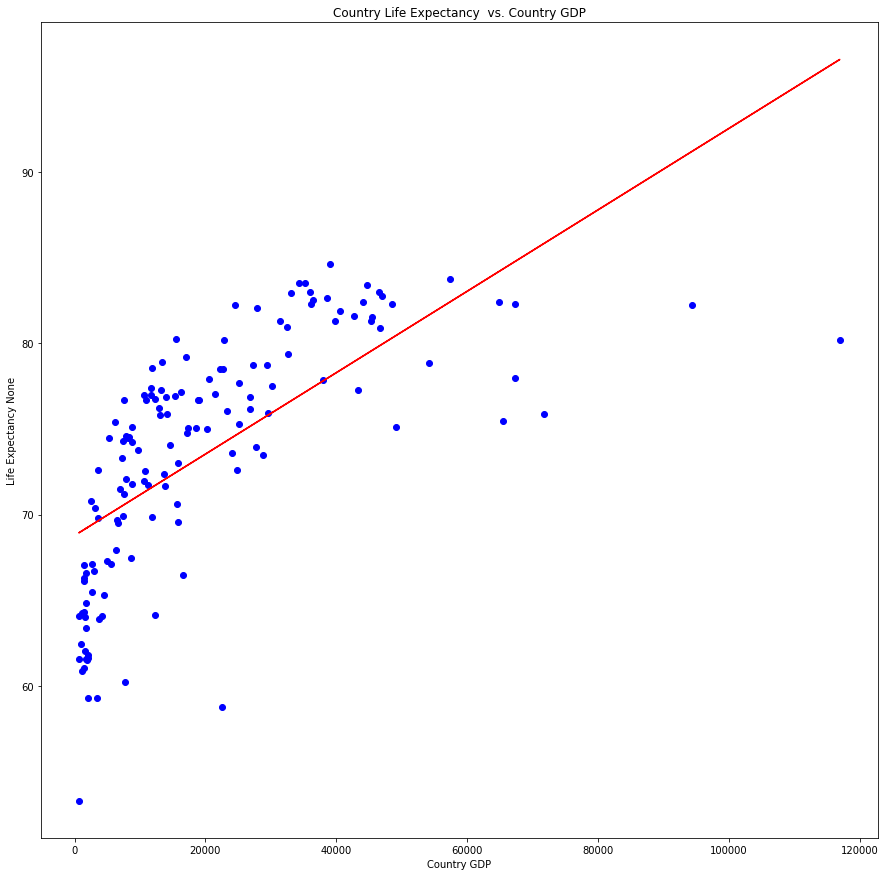

In [190]:
# Calculate the linear regression equation Country - Life Expectancy vs. Country GDP

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Country GDP"]
                               , "y_values"       : Location_Summary["Life Expectancy"]
                               , "ylabel"         : "Life Expectancy"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.113512150274987


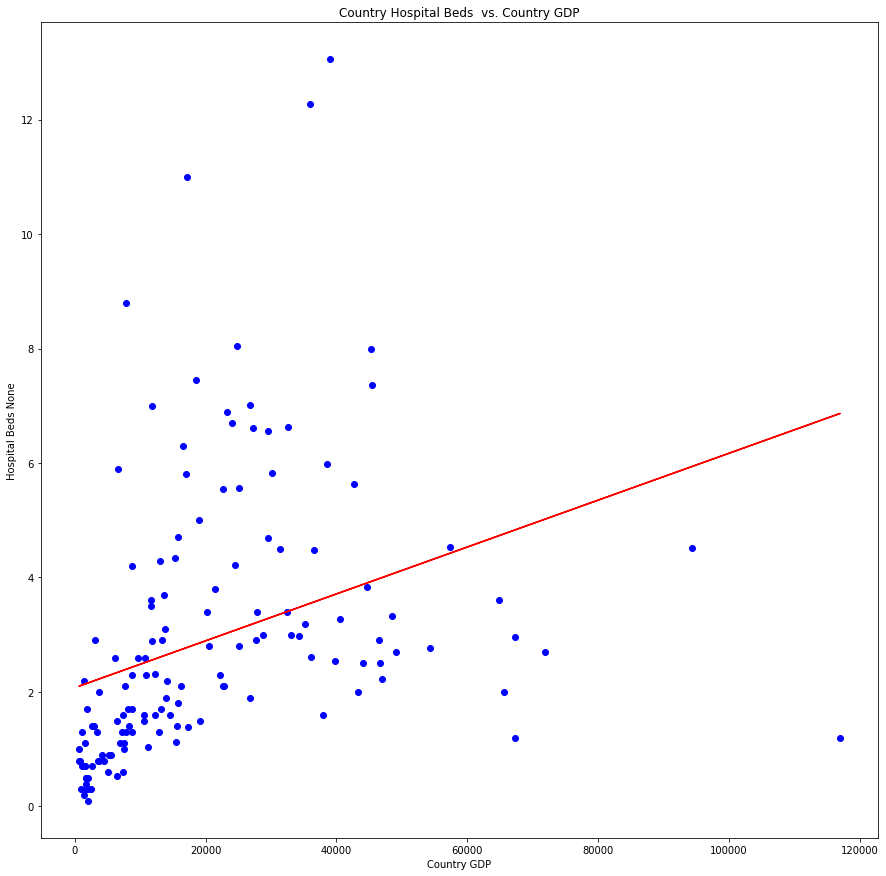

In [191]:
# Calculate the linear regression equation Country - Hospital Beds per Thousand vs. Country GDP

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Country GDP"]
                               , "y_values"       : Location_Summary["Hospital Beds"]
                               , "ylabel"         : "Hospital Beds"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.2320736140816916


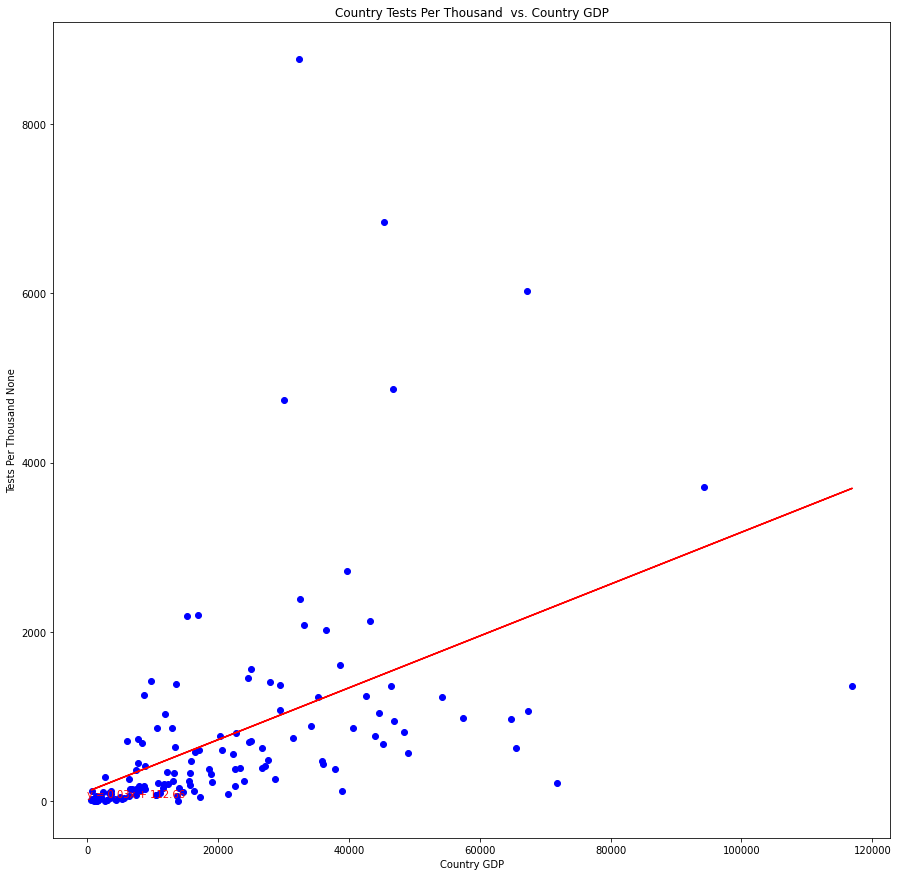

In [192]:
# Calculate the linear regression equation Country - Tests per Thousand vs. Country GDP

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                              , "x_values"       : Location_Summary["Country GDP"]
                               , "y_values"       : Location_Summary["Testing per Thousand"]
                               , "ylabel"         : "Tests Per Thousand"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.010014935570917195


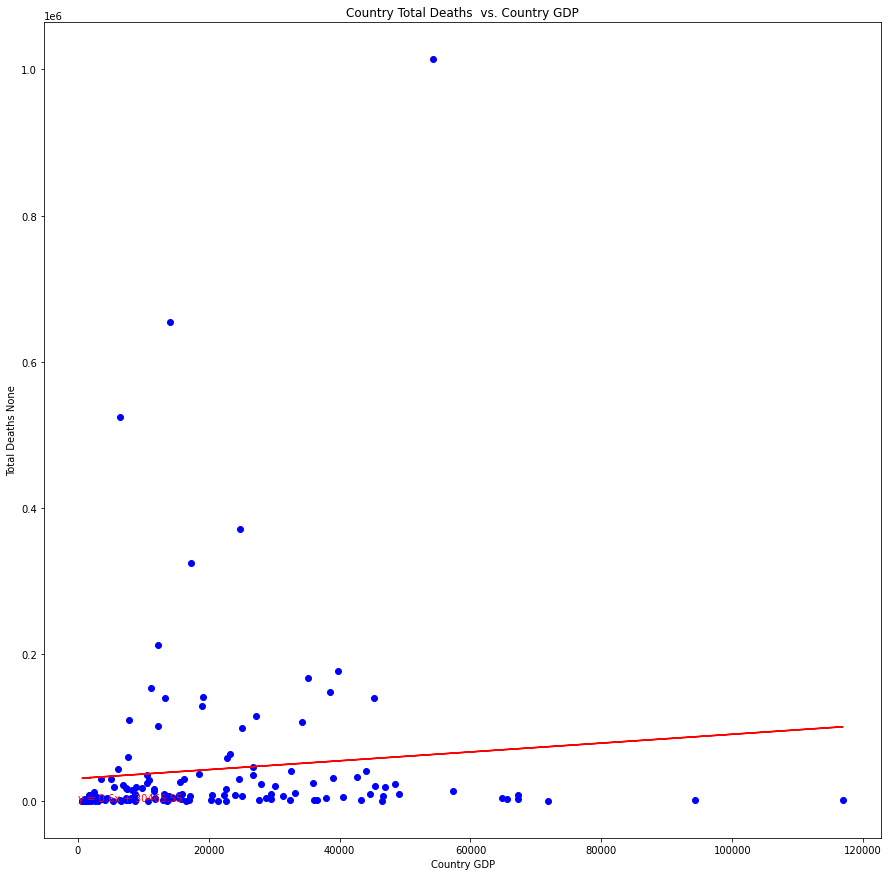

In [193]:
# Calculate the linear regression equation Country - Total Deaths vs. Country GDP

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Country GDP"]
                               , "y_values"       : Location_Summary["Total Deaths"]
                               , "ylabel"         : "Total Deaths"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.03369170555540972


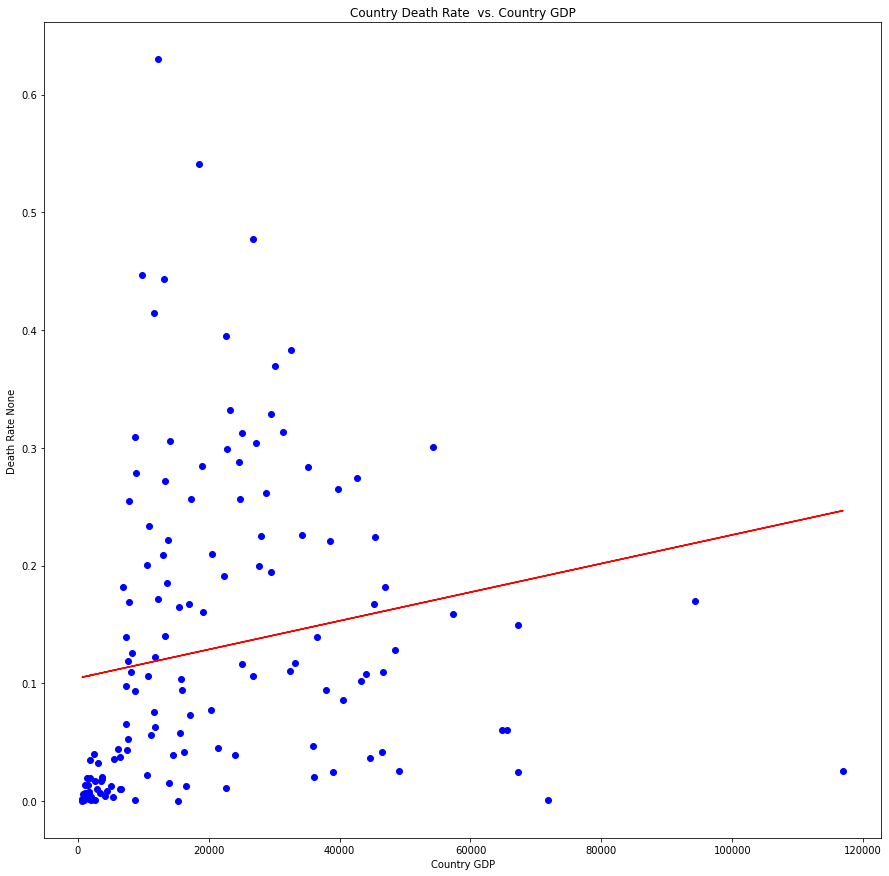

In [194]:
# Calculate the linear regression equation Country - Total Deaths vs. Country GDP

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Country GDP"]
                               , "y_values"       : Location_Summary["Death Rate"]
                               , "ylabel"         : "Death Rate"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

In [195]:
# Define a function to create linear regression for a Country and y_axis vs Total Deaths
def create_linear_regression(linear_regression_parms_dict):
    
    # Save the parms value from parms dict
    Location_Summary = linear_regression_parms_dict.get("Location_Summary")
    x_values       = linear_regression_parms_dict.get("x_values")
    y_values       = linear_regression_parms_dict.get("y_values")
    ylabel         = linear_regression_parms_dict.get("ylabel")
    unit           = linear_regression_parms_dict.get("unit")
    annotatate_x   = linear_regression_parms_dict.get("annotatate_x")  
    annotatate_y   = linear_regression_parms_dict.get("annotatate_y") 
    
    # Perform a linear regression on y_values vs. x_values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Compare the calcualted Pearson's r to the plots
    plt.scatter( x_values
               , y_values
               , color="blue")

    # Add the line regresssion to plot
    plt.plot(x_values,regress_values,"r-")

    # Annotate the line equation
    plt.annotate(line_eq,(annotatate_x, annotatate_y),fontsize=10,color="red")

    # Set the title and x & y labels
    xlabel = "Total Deaths"
    plt.xlabel (f"{xlabel}")
    plt.ylabel (f"{ylabel} {unit}")
    plt.title  (f"{Location_Summary} {ylabel}  vs. {xlabel}")

     # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

The r-value is: 0.019629350043058696


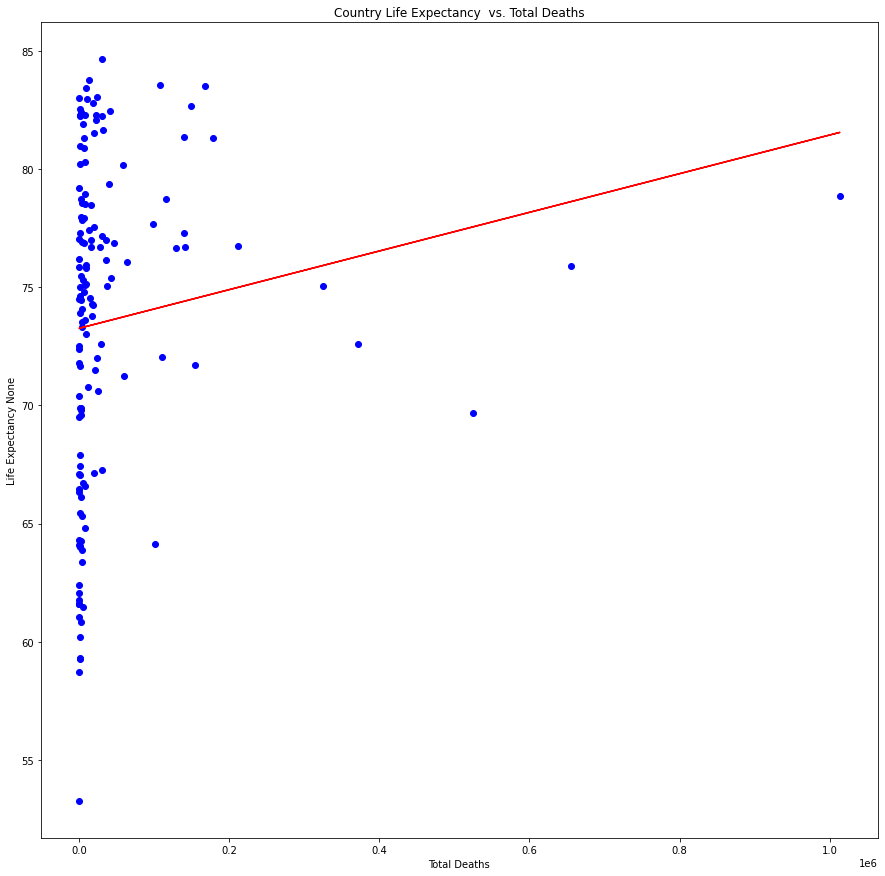

In [196]:
# Calculate the linear regression equation Country - Total Deaths vs. Life Expectancy

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Total Deaths"]
                               , "y_values"       : Location_Summary["Life Expectancy"]
                               , "ylabel"         : "Life Expectancy"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.022101840601024006


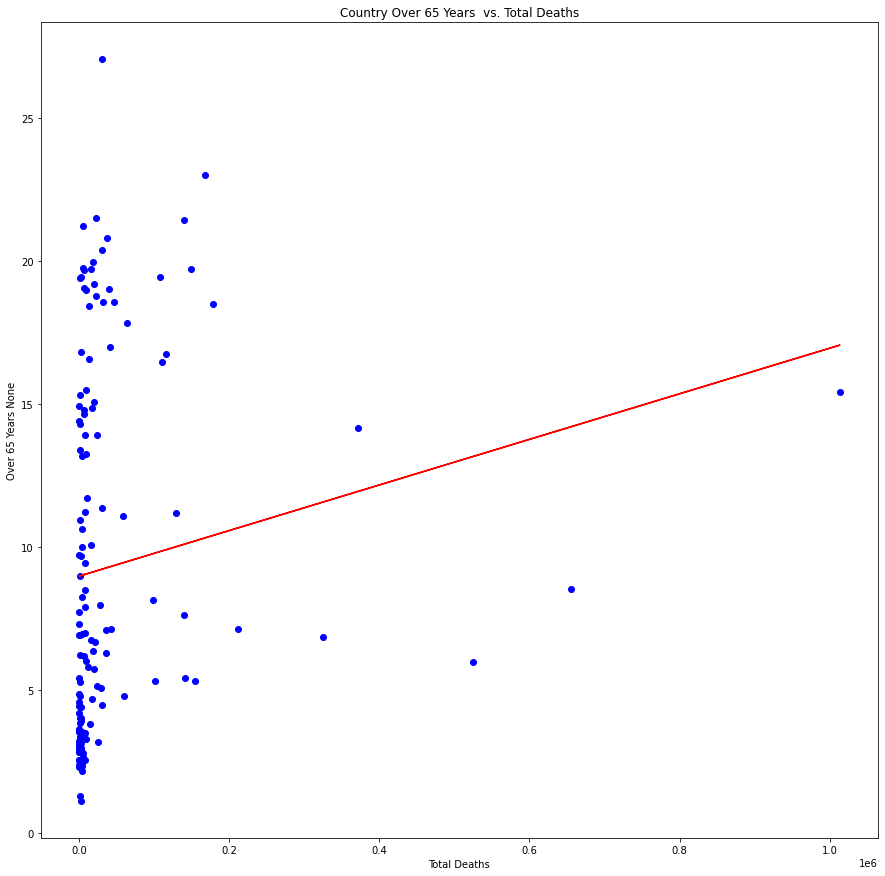

In [197]:
# Calculate the linear regression equation Country - Total Deaths vs. Over 65 Years of Age

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Total Deaths"]
                               , "y_values"       : Location_Summary["Over 65 Years"]
                               , "ylabel"         : "Over 65 Years"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.01987527008553912


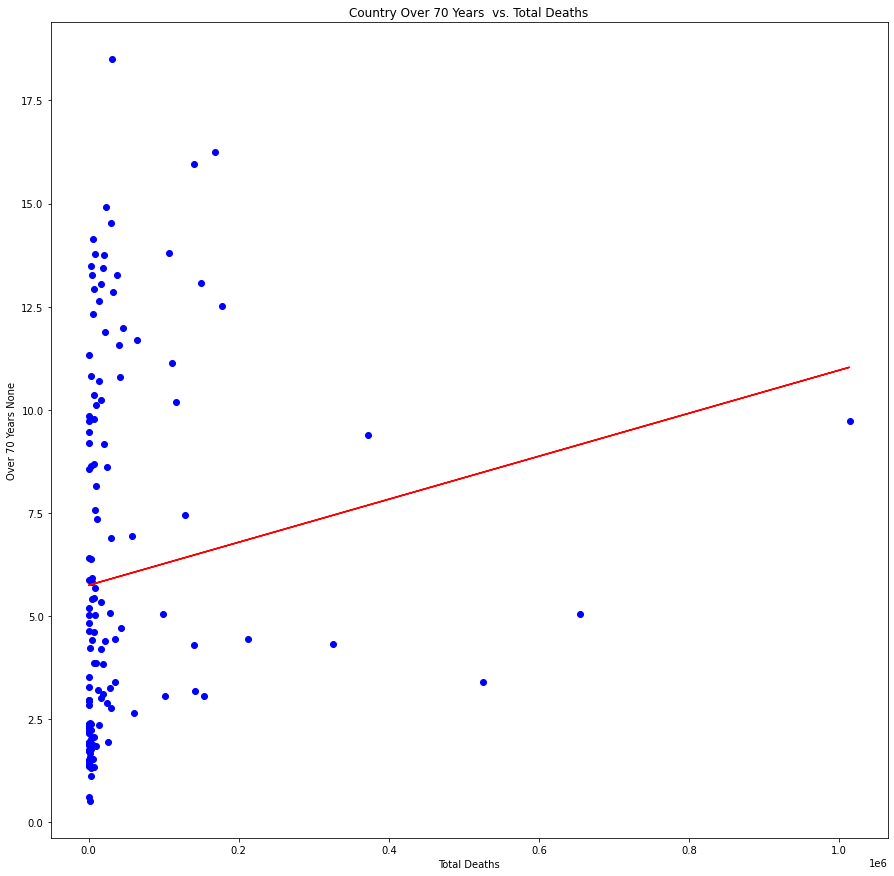

In [198]:
# Calculate the linear regression equation Country - Total Deaths vs. Over 70 Years

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Total Deaths"]
                               , "y_values"       : Location_Summary["Over 70 Years"]
                               , "ylabel"         : "Over 70 Years"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

In [199]:
# Define a function to create linear regression for a Country and y_axis vs Death Rates
def create_linear_regression(linear_regression_parms_dict):
    
    # Save the parms value from parms dict
    Location_Summary = linear_regression_parms_dict.get("Location_Summary")
    x_values       = linear_regression_parms_dict.get("x_values")
    y_values       = linear_regression_parms_dict.get("y_values")
    ylabel         = linear_regression_parms_dict.get("ylabel")
    unit           = linear_regression_parms_dict.get("unit")
    annotatate_x   = linear_regression_parms_dict.get("annotatate_x")  
    annotatate_y   = linear_regression_parms_dict.get("annotatate_y") 
    
    # Perform a linear regression on y_values vs. x_values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Compare the calcualted Pearson's r to the plots
    plt.scatter( x_values
               , y_values
               , color="blue")

    # Add the line regresssion to plot
    plt.plot(x_values,regress_values,"r-")

    # Annotate the line equation
    plt.annotate(line_eq,(annotatate_x, annotatate_y),fontsize=10,color="red")

    # Set the title and x & y labels
    xlabel = "Death Rates"
    plt.xlabel (f"{xlabel}")
    plt.ylabel (f"{ylabel} {unit}")
    plt.title  (f"{Location_Summary} {ylabel}  vs. {xlabel}")

     # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

The r-value is: 0.351555457868265


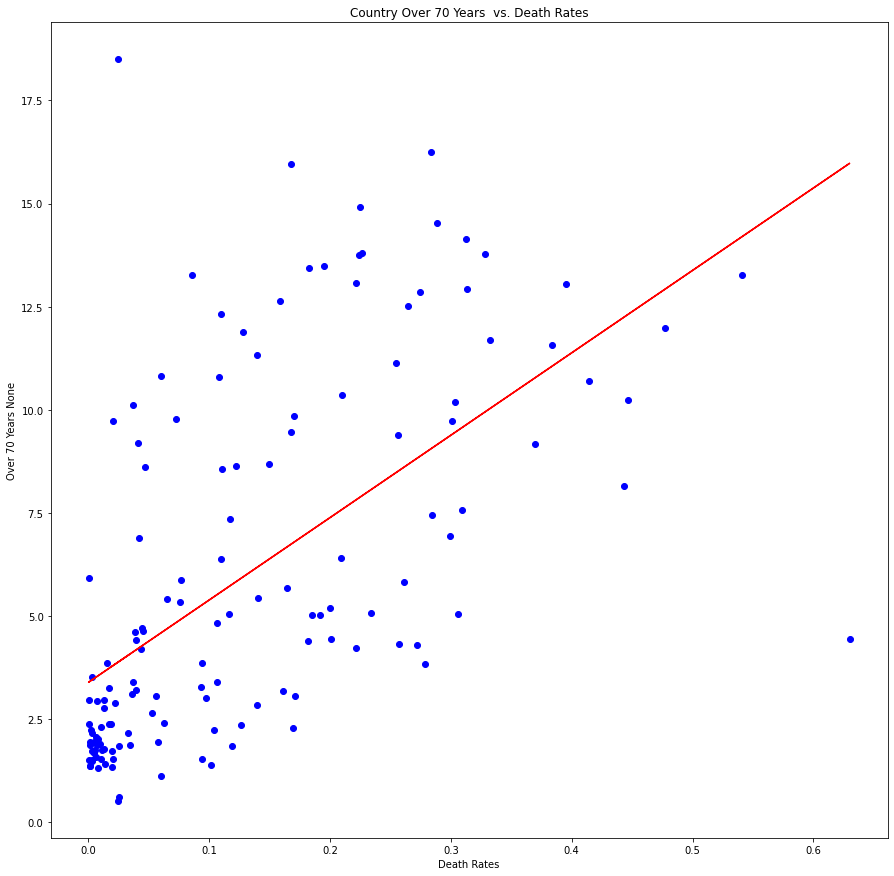

In [200]:
# Calculate the linear regression equation Country - Death Rate vs. Over 70 Years

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Death Rate"]
                               , "y_values"       : Location_Summary["Over 70 Years"]
                               , "ylabel"         : "Over 70 Years"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.35700656860873664


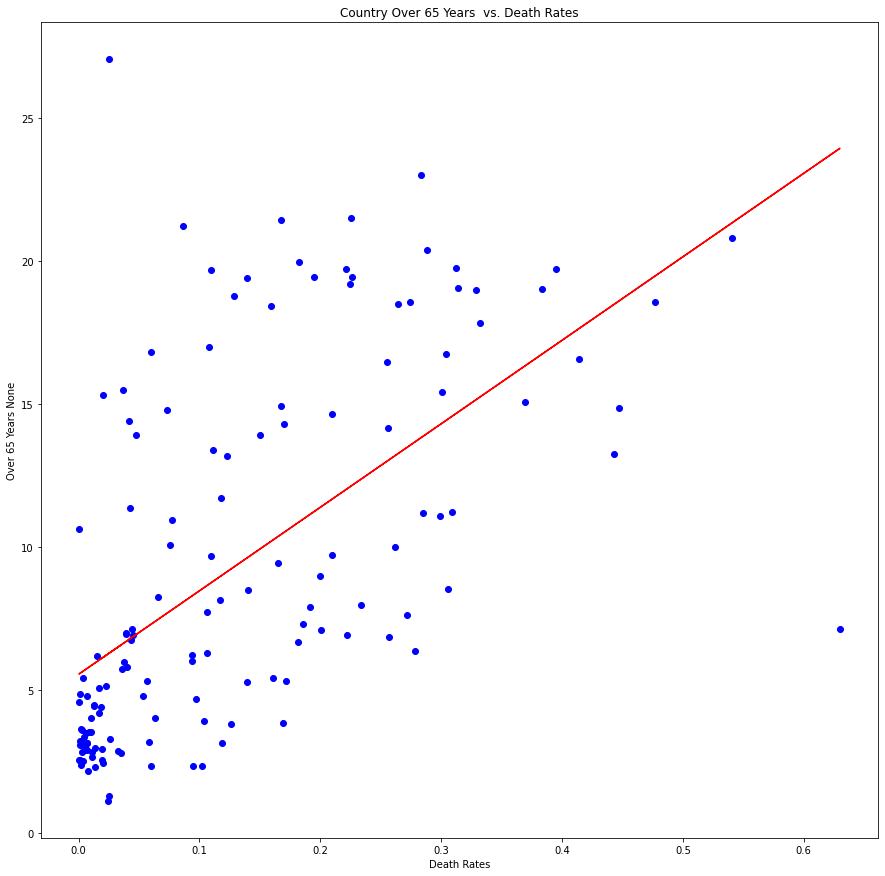

In [201]:
# Calculate the linear regression equation Country - Death Rate vs. Over 65 Years

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Death Rate"]
                               , "y_values"       : Location_Summary["Over 65 Years"]
                               , "ylabel"         : "Over 65 Years"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

The r-value is: 0.21816619763215533


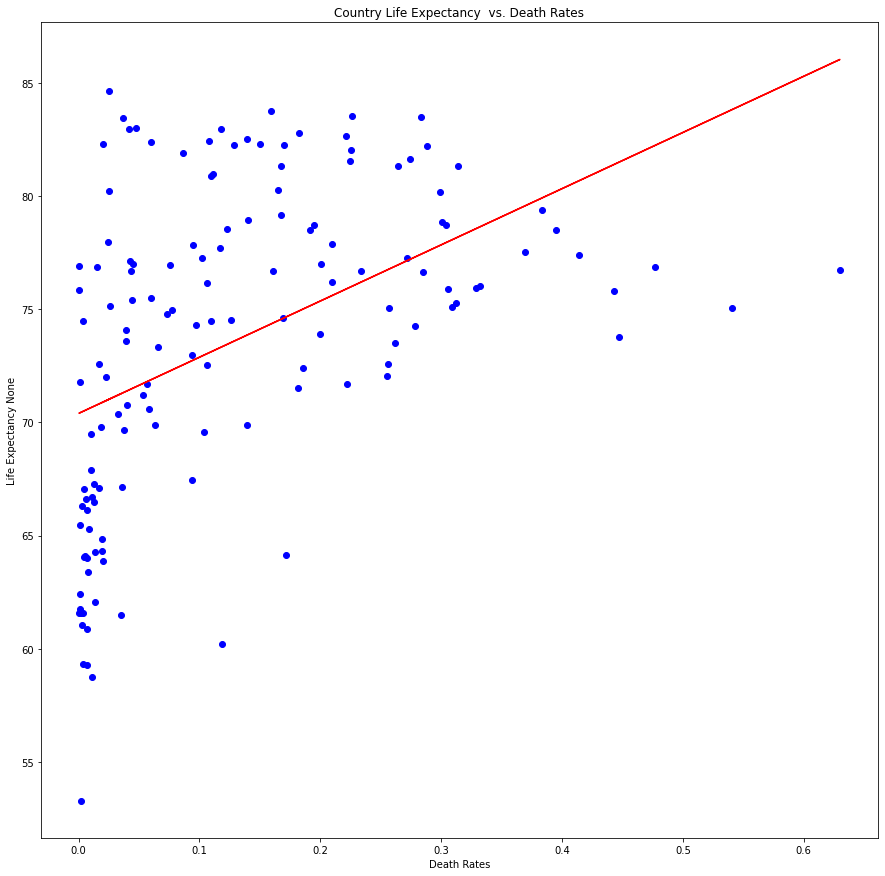

In [202]:
# Calculate the linear regression equation Country - Death Rate vs. Life Expectancy

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "Location_Summary" : "Country"
                               , "x_values"       : Location_Summary["Death Rate"]
                               , "y_values"       : Location_Summary["Life Expectancy"]
                               , "ylabel"         : "Life Expectancy"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50                           
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

# Do countries with lower GDP’s, reduced services and a lower life expectancy show a higher COVID-19 related death rate or is the inverse true where a higher life expectancy and therefore an aging population inflate these numbers?

As expected we see a positive correlation between the Country GDP & Life expectancy as well as GDP vs Hospital Beds per Thousand. However looking at the data plotting Country Death Rate vs GDP we are not seeing the negative correlation that what was expected as per the hypothesis that you would see higher death rate in less developed countries. We must however note that the data is limited by the accurate reporting from less developed countries on the death rate related to COVID-19. Following this we elected to review how the the aging populations in countries with higher GDP's (and therefore higher life expectancy) impacted the death rate in these countries. What we see is the death rate has a strong positive correlation in the aging population which could lend to the observation that the age of the population is the stronger contibuiting factor to death rate rather than COVID-19.

# Stringency Measures and research into their impact on New Case rates

In [203]:
# New cases vs Government stringency 
stringency_df = covid_data[['continent', 'location', 'date', 'total_cases', 'new_cases', 'reproduction_rate', 'new_cases_smoothed_per_million', 'stringency_index', 'total_vaccinations']]
stringency_df.reset_index(drop=True)
stringency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207316 entries, 0 to 207315
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   continent                       195332 non-null  object 
 1   location                        207316 non-null  object 
 2   date                            207316 non-null  object 
 3   total_cases                     198929 non-null  float64
 4   new_cases                       198642 non-null  float64
 5   reproduction_rate               155030 non-null  float64
 6   new_cases_smoothed_per_million  196556 non-null  float64
 7   stringency_index                155352 non-null  float64
 8   total_vaccinations              57904 non-null   float64
dtypes: float64(6), object(3)
memory usage: 14.2+ MB


In [204]:
stringency_df = stringency_df.fillna(0)
stringency_df = stringency_df.reset_index(drop=True)

spending_bin = list(np.linspace(-0.01,100,21))

spending_labels = ["0-5", "5-10","10-15","15-20", "20-25","25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75", "75-80", "80-85", "85-90", "90-95", "95-100" ] 
stringency_df["Stringency Group"] = pd.cut(stringency_df["stringency_index"], spending_bin, labels=spending_labels)
stringency_df.head(50)
spending_bin


[-0.01,
 4.990500000000001,
 9.991000000000001,
 14.991500000000002,
 19.992,
 24.992500000000003,
 29.993000000000002,
 34.993500000000004,
 39.99400000000001,
 44.99450000000001,
 49.99500000000001,
 54.99550000000001,
 59.99600000000001,
 64.9965,
 69.997,
 74.9975,
 79.998,
 84.9985,
 89.99900000000001,
 94.99950000000001,
 100.0]

In [205]:
# Creating a new column to represent the change in new cases per million
# NOTE - This cell runs inside of VSCODE but in Jupyter Notebooks returns an error. 
# I went forth continuing to finish and gain results but I will need to rectify this issue for jupyter notebooks

for index in range(len(stringency_df)):
    # Starting condition for first row
    if index == 0:
        stringency_df.loc[index, 'Change in New Cases'] = 0
    
    elif stringency_df.loc[index,'new_cases_smoothed_per_million'] == 0:
        stringency_df.loc[index, 'Change in New Cases'] = 0

    elif stringency_df.loc[index,'new_cases_smoothed_per_million'] != last :
        stringency_df.loc[index, 'Change in New Cases'] = (((stringency_df.loc[index,'new_cases_smoothed_per_million'])/((stringency_df.loc[(index-1), 'new_cases_smoothed_per_million'])))-1)*100
    
    elif stringency_df.loc[index,'new_cases_smoothed_per_million'] == last:
        stringency_df.loc[index, 'Change in New Cases'] = 0

    # Store into last value the current value of new_cases_smoothed_per_million    
    last = stringency_df.loc[index,'new_cases_smoothed_per_million']

stringency_df.head()

c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


continent     location        date  total_cases  new_cases  \
0       Asia  Afghanistan  2020-02-24          5.0        5.0   
..       ...          ...         ...          ...        ...   

    reproduction_rate  new_cases_smoothed_per_million  stringency_index  \
0                 0.0                             0.0              8.33   
..                ...                             ...               ...   

    total_vaccinations Stringency Group  Change in New Cases  
0                  0.0             5-10                  0.0  
..                 ...              ...                  ...  

[5 rows x 11 columns]

In [206]:
# Cleaning dataset and filling any NaN values with 0
# Formatting Date column to datetime type

stringency_df = stringency_df.replace([np.inf, -np.inf], np.nan)
stringency_df['Change in New Cases'] = stringency_df['Change in New Cases'].fillna(0)
stringency_df['date'] =  pd.to_datetime(stringency_df['date'], format='%Y-%m-%d')

stringency_df.head()

continent     location       date  total_cases  new_cases  \
0       Asia  Afghanistan 2020-02-24          5.0        5.0   
..       ...          ...        ...          ...        ...   

    reproduction_rate  new_cases_smoothed_per_million  stringency_index  \
0                 0.0                             0.0              8.33   
..                ...                             ...               ...   

    total_vaccinations Stringency Group  Change in New Cases  
0                  0.0             5-10                  0.0  
..                 ...              ...                  ...  

[5 rows x 11 columns]

In [207]:
# Print Graph - Stringency Timeline
def graph_stringency_country(country_df):

    x = range(len(country_df['date']))
    y = country_df['stringency_index']

    plt.rcParams["figure.figsize"] = (15,15)
    
    plt.plot(x,y)

    title = country_df.loc[0,'location']
    plt.title(f"{title} - Stringency Timeline (Pre-Vaccine)" , fontsize=40)
    plt.xlabel('Timepoints',fontsize=30)
    plt.ylabel("Stringency Level",fontsize=30)
    
    savename = title + ' Stringency Timeline' + '.png'
    plt.savefig(savename)
    plt.show()

In [208]:
# Print Graph - Total Cases per month 
def total_cases_Monthly(stringency_country):

    country_by_Month = stringency_country.groupby(stringency_country['date'].dt.month).sum()
    
    x = range(len(country_by_Month))
    y = country_by_Month['new_cases']

    # Create Labels for X    
    indexlist = ['January','February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December']
    
    # Set Graph size
    plt.rcParams["figure.figsize"] = (15,15)
    # Plot Graph    
    plt.bar(x,y)

    plt.xticks(rotation=45)
    plt.xticks(x, indexlist)

    # Labels and Title
    title = stringency_country.loc[0,'location']
    plt.title(f'{title} - Total Cases by Month', fontsize=40)
    plt.xlabel("Month",fontsize=30)
    plt.ylabel("Number of New Cases",fontsize=30)
    
    # Display and save
    savename = title + ' Number of New Cases' + '.png'
    plt.savefig(savename)
    plt.show()

In [209]:
# Print Graph - Stringency effect on New Case Rates per million - Raw data
def total_Change_SG(stringency_country):

    country_by_SG = stringency_country.loc[stringency_country['Change in New Cases'] > 0, :]
    country_by_SG  = country_by_SG.groupby('Stringency Group').mean().dropna()
    
    # Raw Data Graph
    x = range(len(country_by_SG['Change in New Cases']))
    y = country_by_SG['Change in New Cases']
    slope, int, r, p, std_err = stats.linregress(x, y)
    fit = slope * x + int

    
    # Plot Graph
    plt.scatter(x, y) 
    plt.plot(x, fit)
    # Axis labels and Title 
    title = stringency_country.loc[0,'location']
    plt.title(f"{title}'s Stringency effect on New Case Rate - Raw" , fontsize=35)
    plt.xlabel("Stringency Range",fontsize=30)
    plt.ylabel("Percent Change in New Cases per Million",fontsize=30)

    # X Ticks
    indexlist = list(country_by_SG.index)
    plt.xticks(rotation=45)
    plt.xticks(x, indexlist)
         
    print(f"The correlation coefficient between stringency and the change in New Cases is {r}")
    savename = title + ' New Cases per Stringency Range' + '.png'
    plt.savefig(savename)
    plt.show()
    return country_by_SG

In [210]:
# Print Graph - Stringency effect on New Case Rates per million - Removed outliers 
def total_Change_SGClean(country_by_SG, stringency_country):
# Find outliers

    y1 = country_by_SG['Change in New Cases']

    quartiles = y1.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
       
    # Remove outliers from data
    outlier_data = country_by_SG
    clean = outlier_data.loc[(outlier_data['Change in New Cases'] > lower_bound) & (outlier_data['Change in New Cases'] < upper_bound)]
    
    # Adjusted Data Graph
    x = range(len(clean['Change in New Cases']))
    y = clean['Change in New Cases']
    slope, int, r, p, std_err = stats.linregress(x, y)
    fit = slope * x + int
    
    # Plot Graph
    plt.scatter(x, y) 
    plt.plot(x, fit) 
    
    # Axis labels and Title 
    title = stringency_country.loc[0,'location']
    
    plt.title(f"{title}'s Stringency effect on New Case Rate - Cleaned" , fontsize=35)
    plt.xlabel("Stringency Range",fontsize=30)
    plt.ylabel("Percent Change in New Cases per Million",fontsize=30)
    
    # X Ticks
    indexlist = list(clean.index)
    plt.xticks(rotation=45)
    plt.xticks(x, indexlist)

    print(f"The correlation coefficient between stringency and the change in New Cases is {r}")
    
    savename = title + ' New Cases per Stringency Range - Clean' + '.png'
    plt.savefig(savename)
    plt.show()

In [211]:
# Graph Print - Pie - Country - Time in Stringency Range 
def pie_stringency(location_groupby, stringency_country):

    fig1, ax1 = plt.subplots(figsize=(10, 10))
    fig1.subplots_adjust(0.3, 0, 1, 1)
    
    theme = plt.get_cmap('bwr')
    ax1.set_prop_cycle("color", [theme(1. * i / len(location_groupby))
                              for i in range(len(location_groupby))])
 
    _, _ = ax1.pie(location_groupby['Stringency range count'], startangle=90, radius=1800)
    ax1.axis('equal')
 
    plt.legend(
                loc='upper left',
                labels=(location_groupby['Stringency Group']),
                prop={'size': 11},
                bbox_to_anchor=(0.0, 1),
                bbox_transform=fig1.transFigure
                )
    plt.title(f"{stringency_country.loc[0,'location']} Stringency Visual", fontsize=50) 
 
    title = stringency_country.loc[0,'location']
    savename = title + ' Stringency Visual' + '.png'
    plt.savefig(savename)
    plt.show()

In [212]:
# Create DF with count of days spent in specific Stringency range

def stringency_count(stringency_location):

    stringency_range = stringency_location.groupby('Stringency Group').count().dropna()
    stringency_range = stringency_range[['Change in New Cases']]
    stringency_range = stringency_range.rename(columns={'Change in New Cases':'Stringency range count'}).reset_index()
    stringency_location =pd.merge(stringency_location, stringency_range, how='outer', on='Stringency Group').dropna()
   

    location_groupby_SG = stringency_location.groupby('Stringency Group').mean().reset_index().replace(np.nan, 0)
    
    return (location_groupby_SG, stringency_location)

# Australia

In [213]:
stringency_Australia = stringency_df.loc[(stringency_df['location'] == 'Australia'),:]
stringency_Australia = stringency_Australia.loc[(stringency_df['total_vaccinations'] == 0),:]
stringency_Australia = stringency_Australia.loc[(stringency_df['date'] < '2021-02-21'),:]
au_groupby_SG, stringency_Australia  = stringency_count(stringency_Australia)

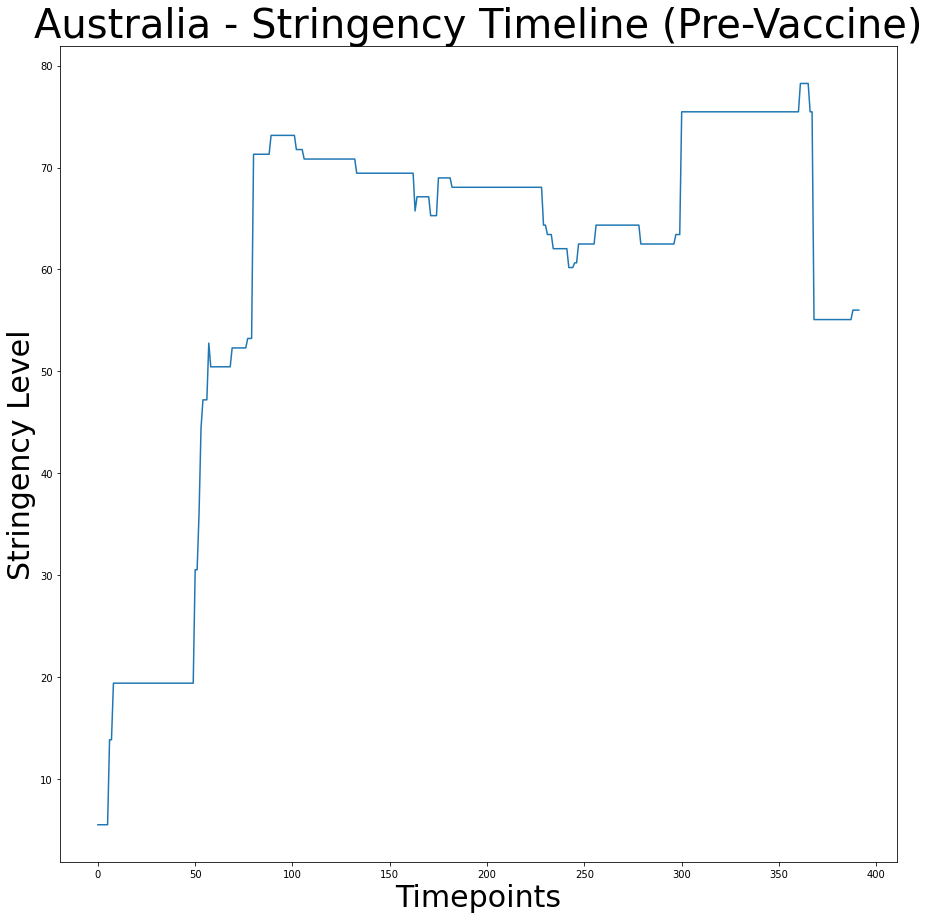

In [214]:
graph_stringency_country(stringency_Australia)

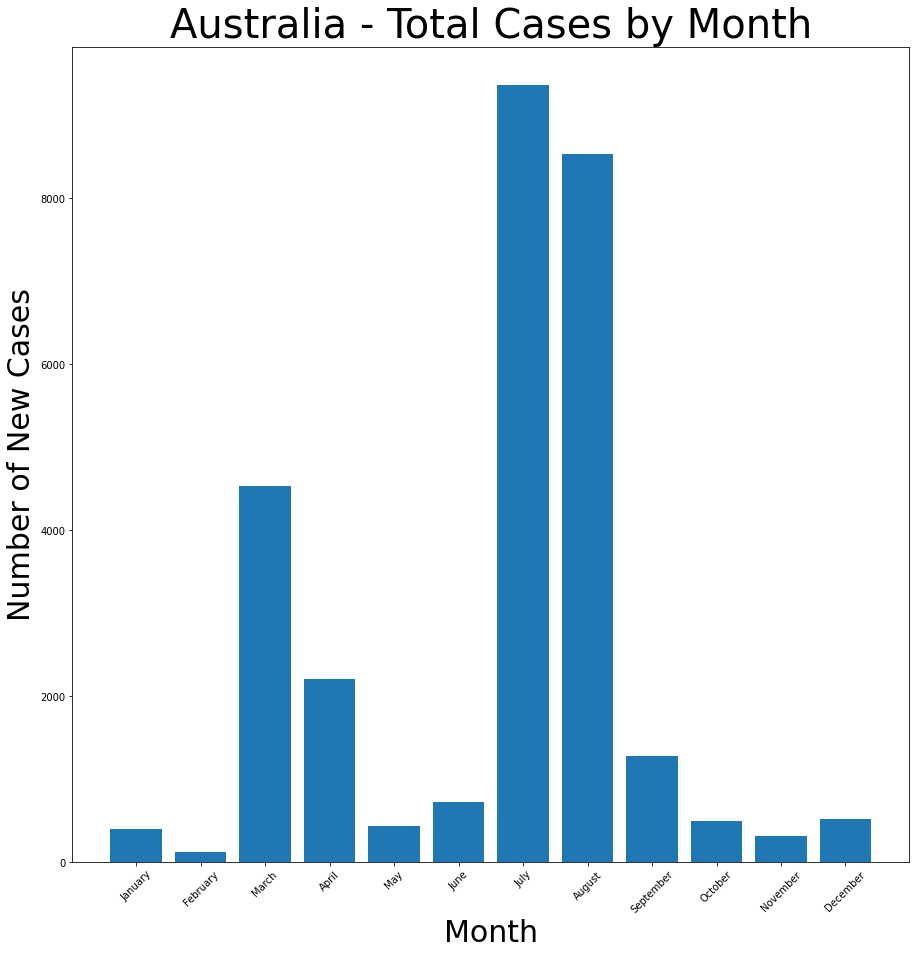

In [215]:
total_cases_Monthly(stringency_Australia)

The correlation coefficient between stringency and the change in New Cases is -0.8863929250312744


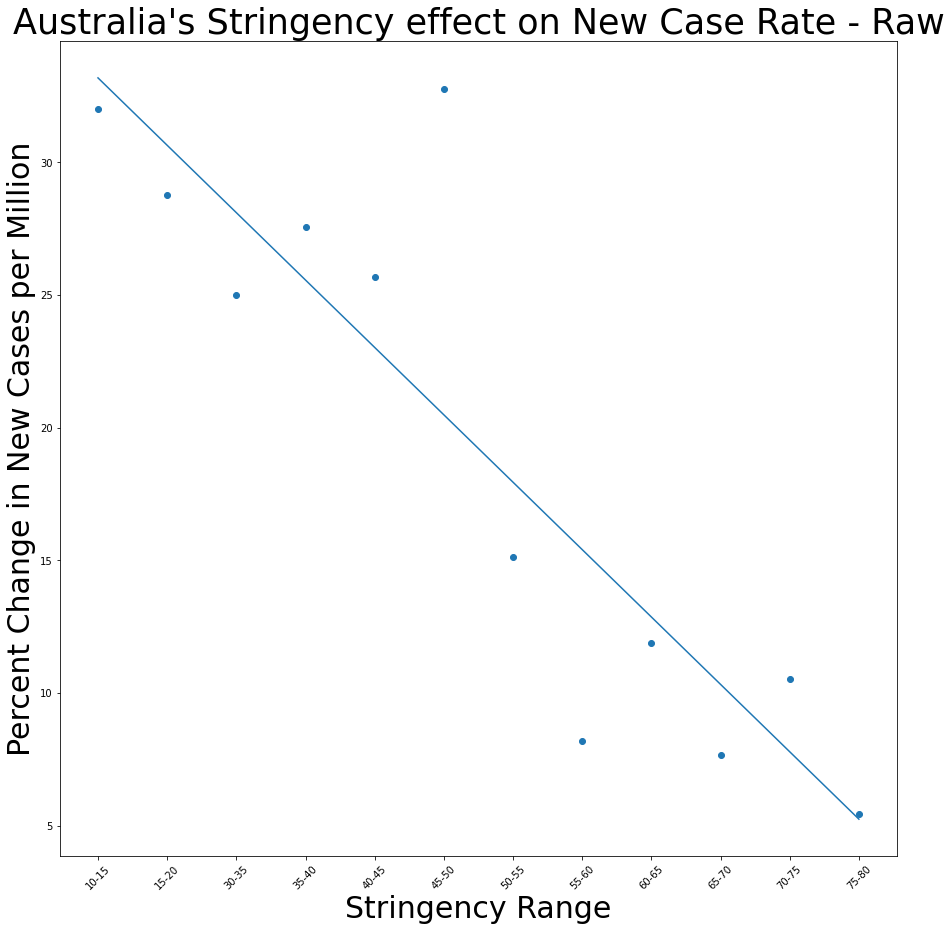

The correlation coefficient between stringency and the change in New Cases is -0.8863929250312744


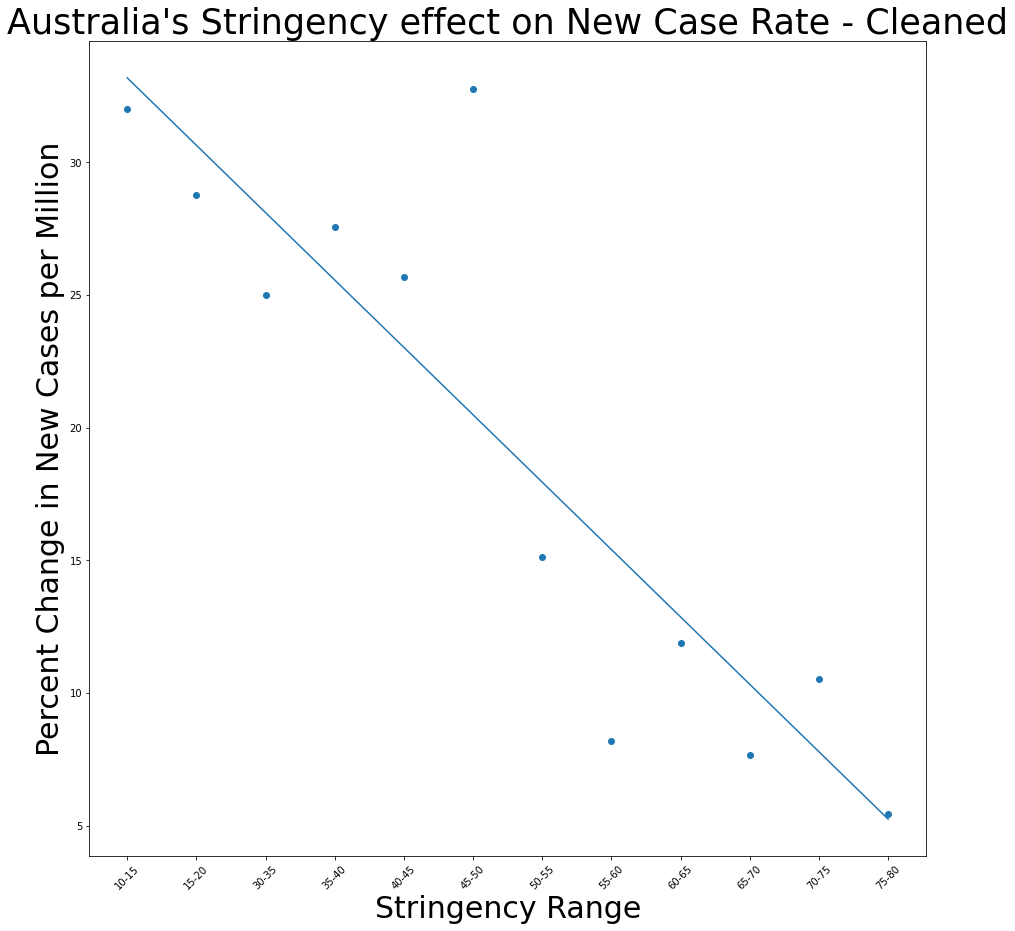

In [216]:
australia_by_SG = total_Change_SG(stringency_Australia)
total_Change_SGClean(australia_by_SG, stringency_Australia)

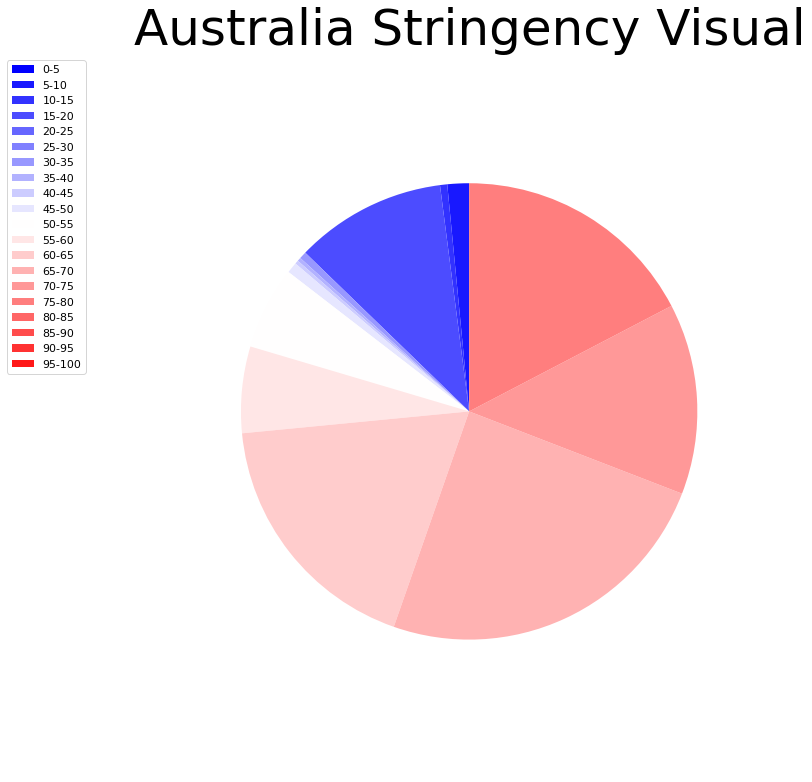

In [217]:
pie_stringency(au_groupby_SG,stringency_Australia)

# New Zealand

In [218]:
stringency_NZ = stringency_df.loc[(stringency_df['location'] == 'New Zealand') &
                    (stringency_df['total_vaccinations'] == 0),:]
stringency_NZ = stringency_NZ.loc[stringency_NZ['date'] < '2021-02-19', :]      
nz_groupby_SG, stringency_NZ  = stringency_count(stringency_NZ)      

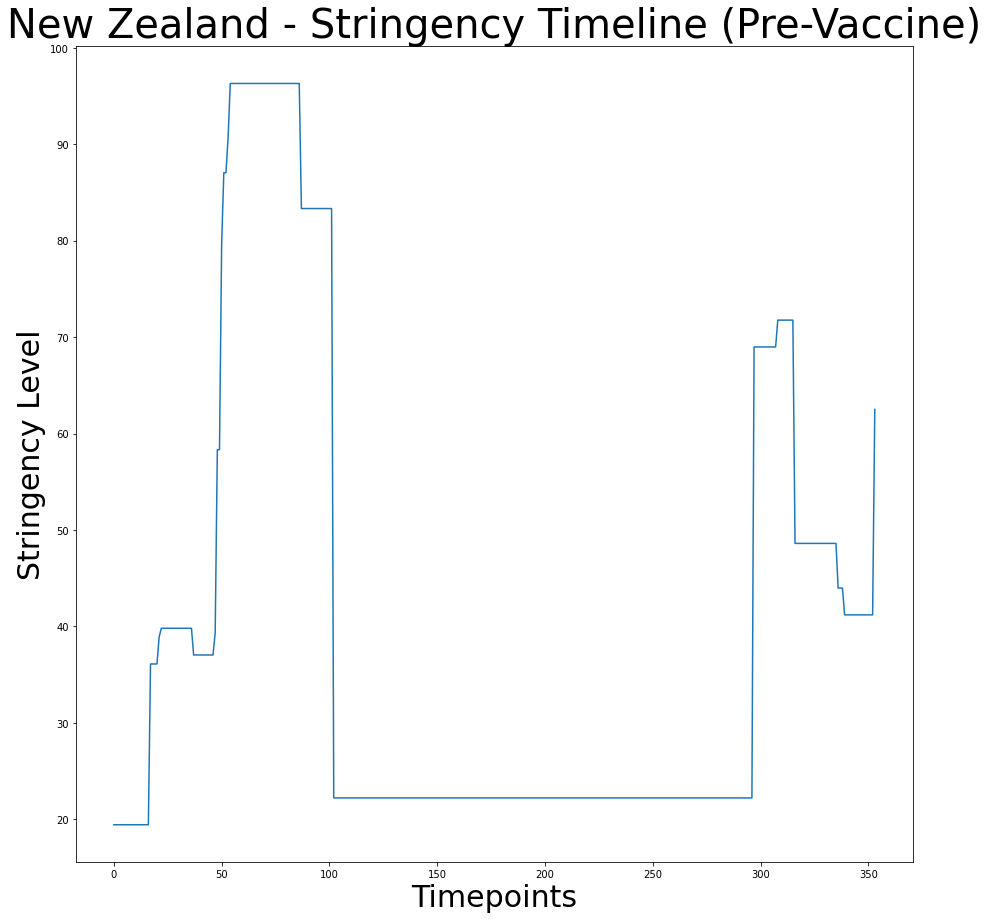

In [219]:
graph_stringency_country(stringency_NZ)

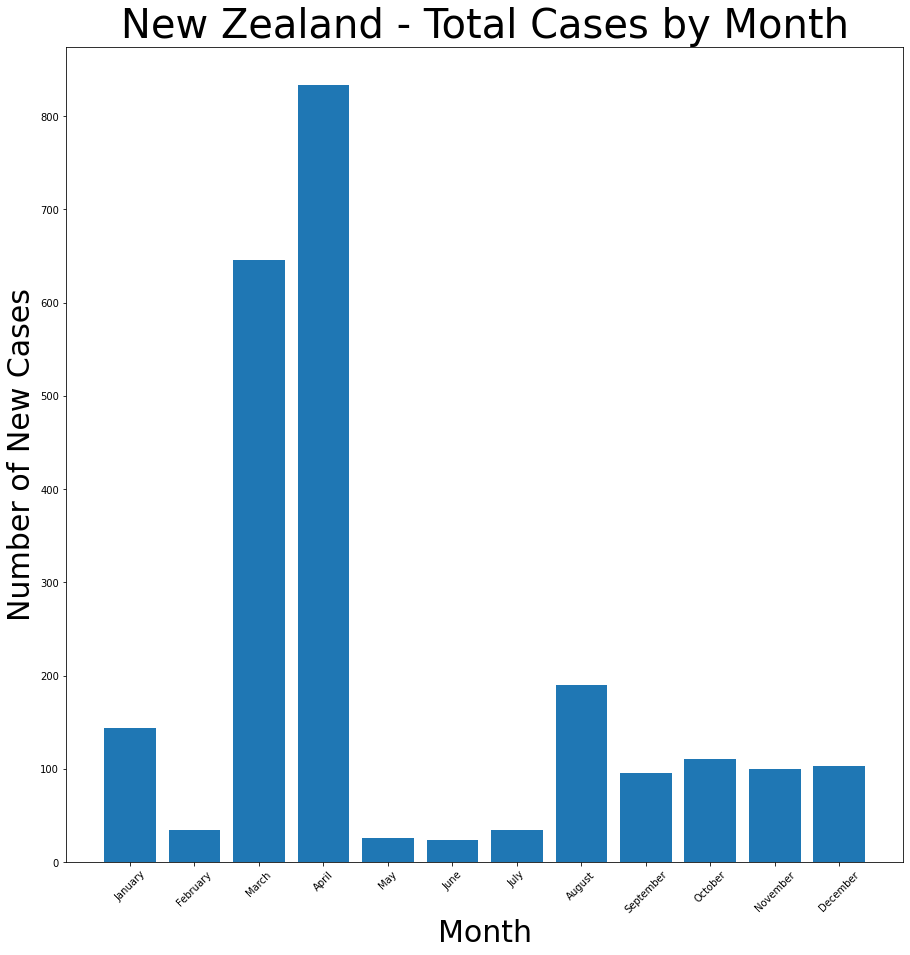

In [220]:
total_cases_Monthly(stringency_NZ)

The correlation coefficient between stringency and the change in New Cases is -0.14808784461475977


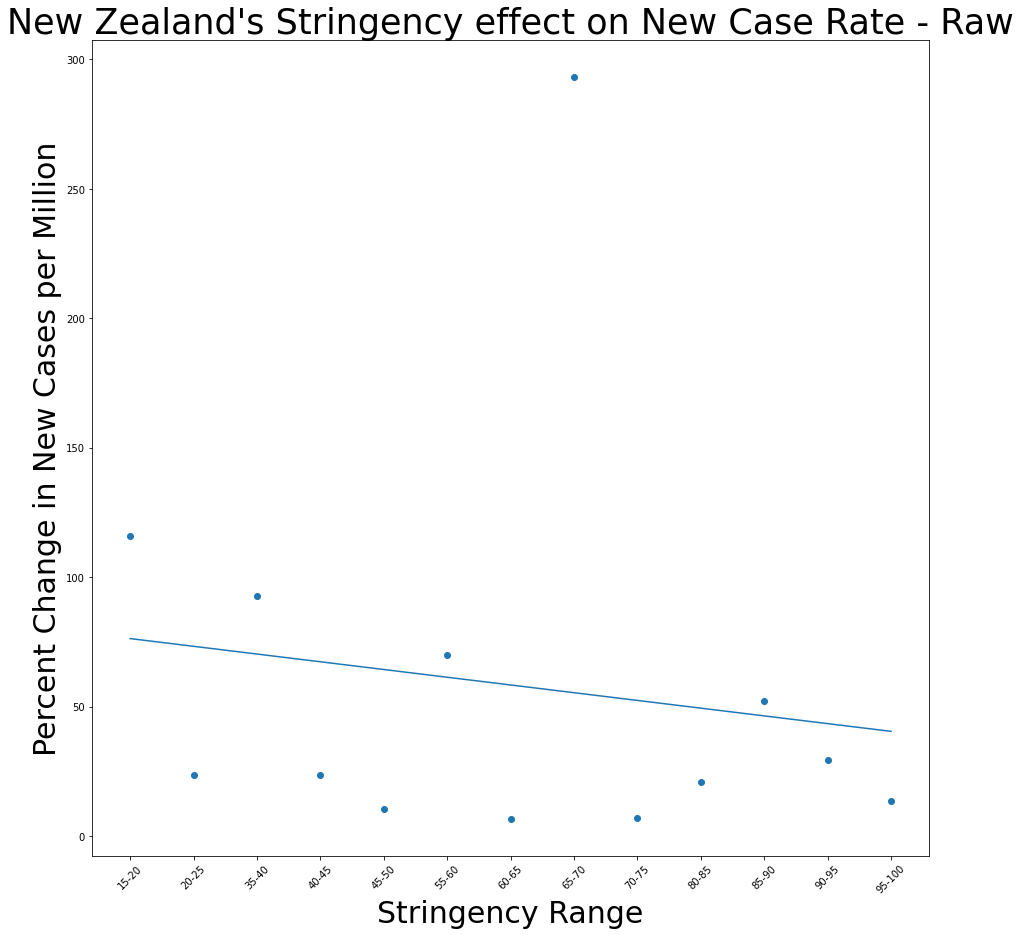

The correlation coefficient between stringency and the change in New Cases is -0.5065248151196177


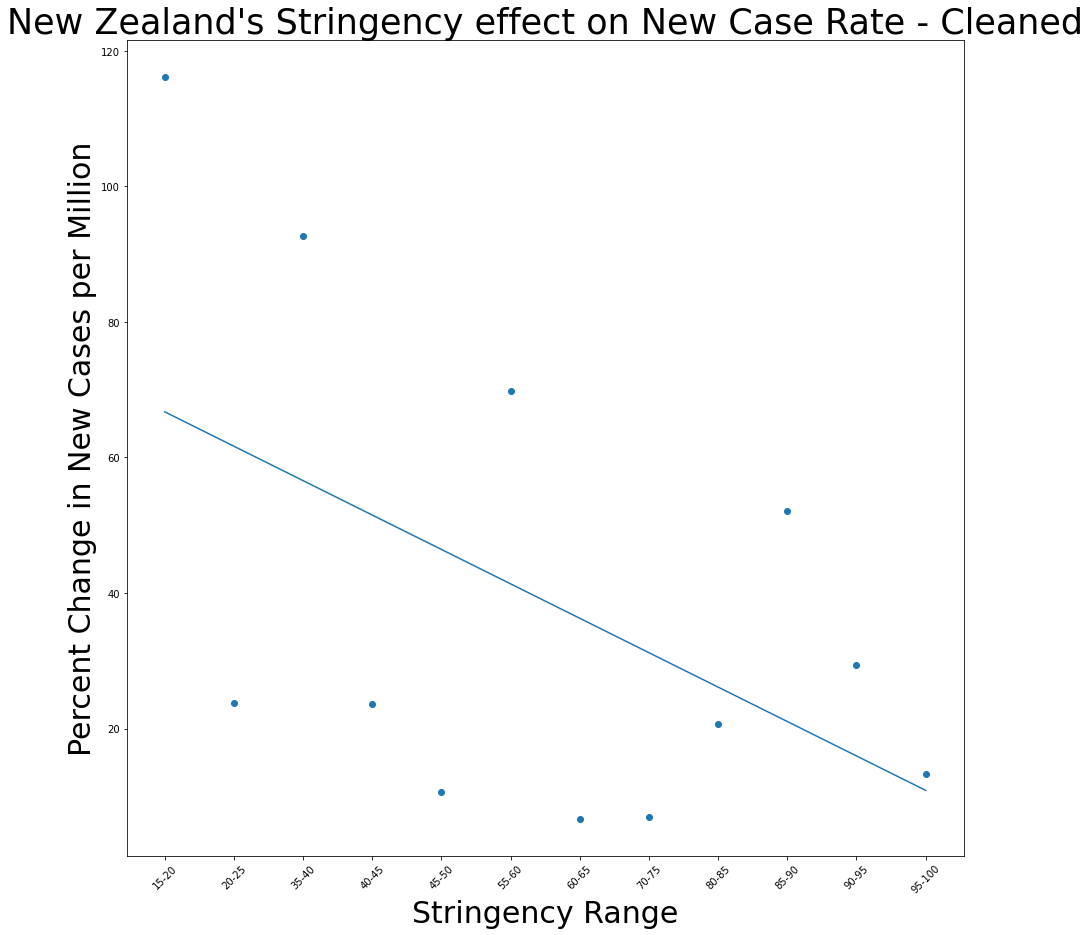

In [221]:
nz_by_SG = total_Change_SG(stringency_NZ)
total_Change_SGClean(nz_by_SG, stringency_NZ)

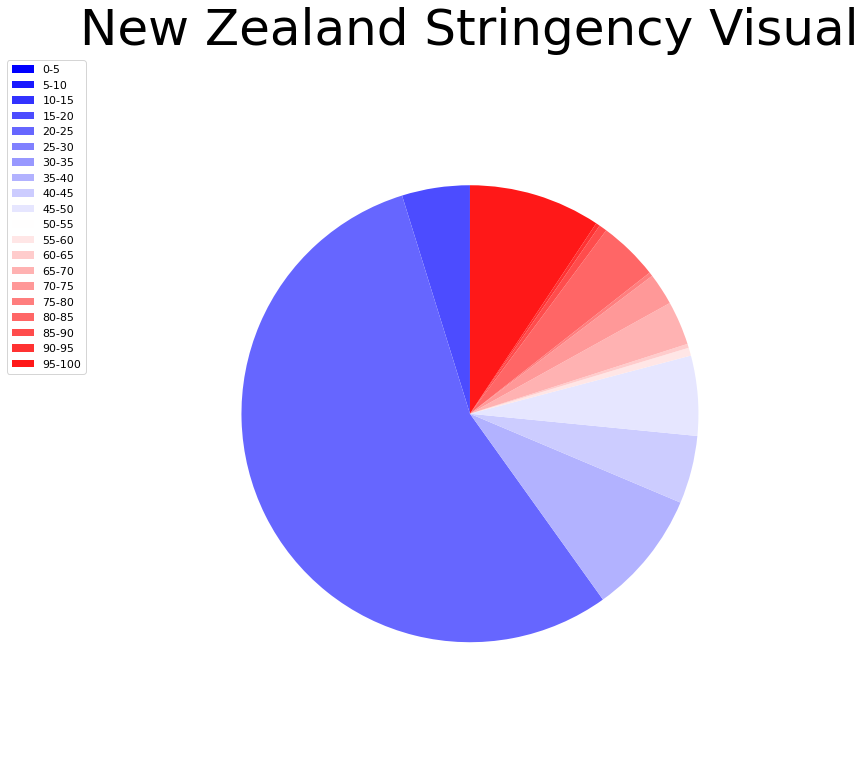

In [222]:
pie_stringency(nz_groupby_SG,stringency_NZ)

# United States of America

In [223]:
stringency_US = stringency_df.loc[(stringency_df['location'] == 'United States') &
                    (stringency_df['total_vaccinations'] == 0),:]
us_groupby_SG, stringency_US  = stringency_count(stringency_US)
stringency_US.head(5)

continent       location       date  total_cases  new_cases  \
0   North America  United States 2020-01-22          1.0        0.0   
..            ...            ...        ...          ...        ...   

    reproduction_rate  new_cases_smoothed_per_million  stringency_index  \
0                 0.0                             0.0               0.0   
..                ...                             ...               ...   

    total_vaccinations Stringency Group  Change in New Cases  \
0                  0.0              0-5                  0.0   
..                 ...              ...                  ...   

    Stringency range count  
0                       17  
..                     ...  

[5 rows x 12 columns]

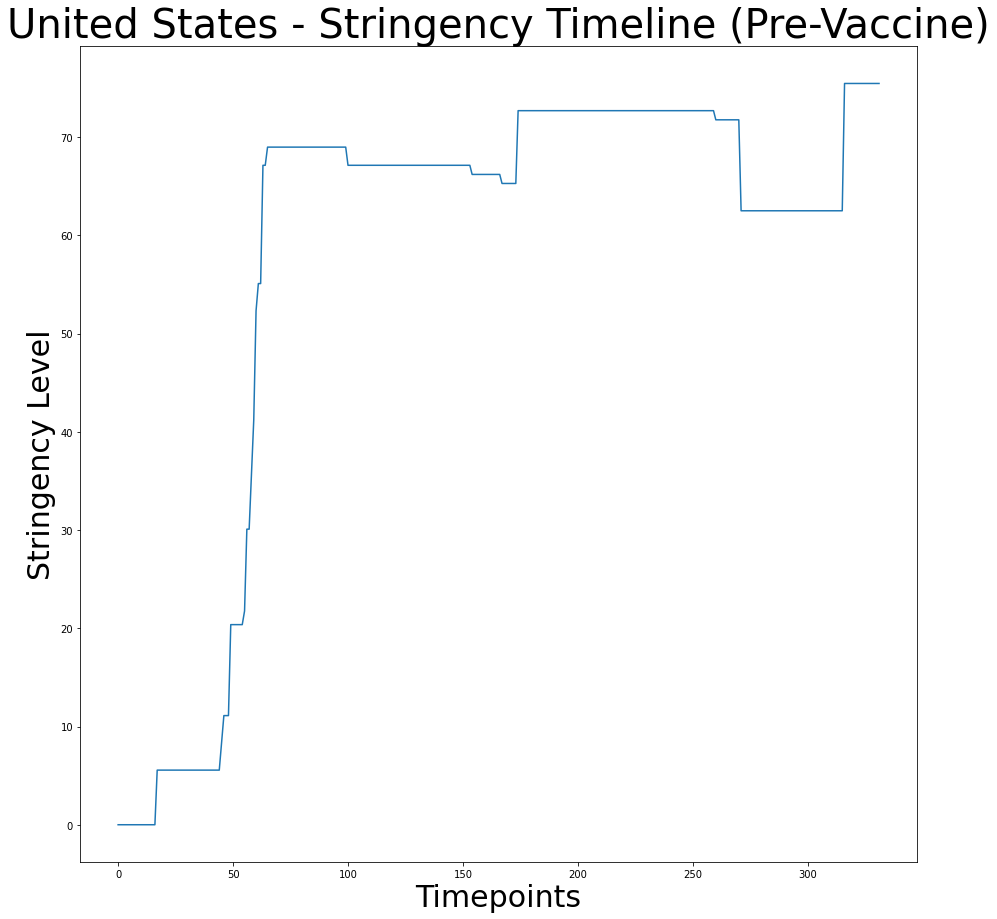

In [224]:
graph_stringency_country(stringency_US)

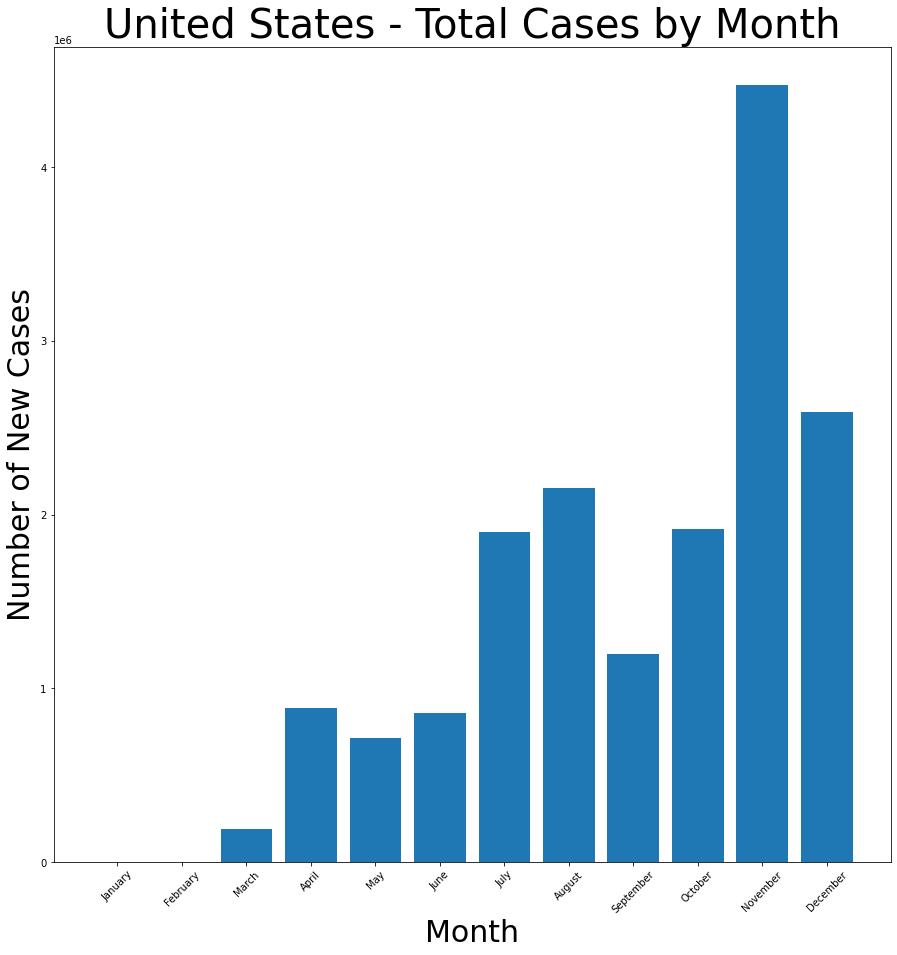

In [225]:
total_cases_Monthly(stringency_US)

The correlation coefficient between stringency and the change in New Cases is -0.6907474784060236


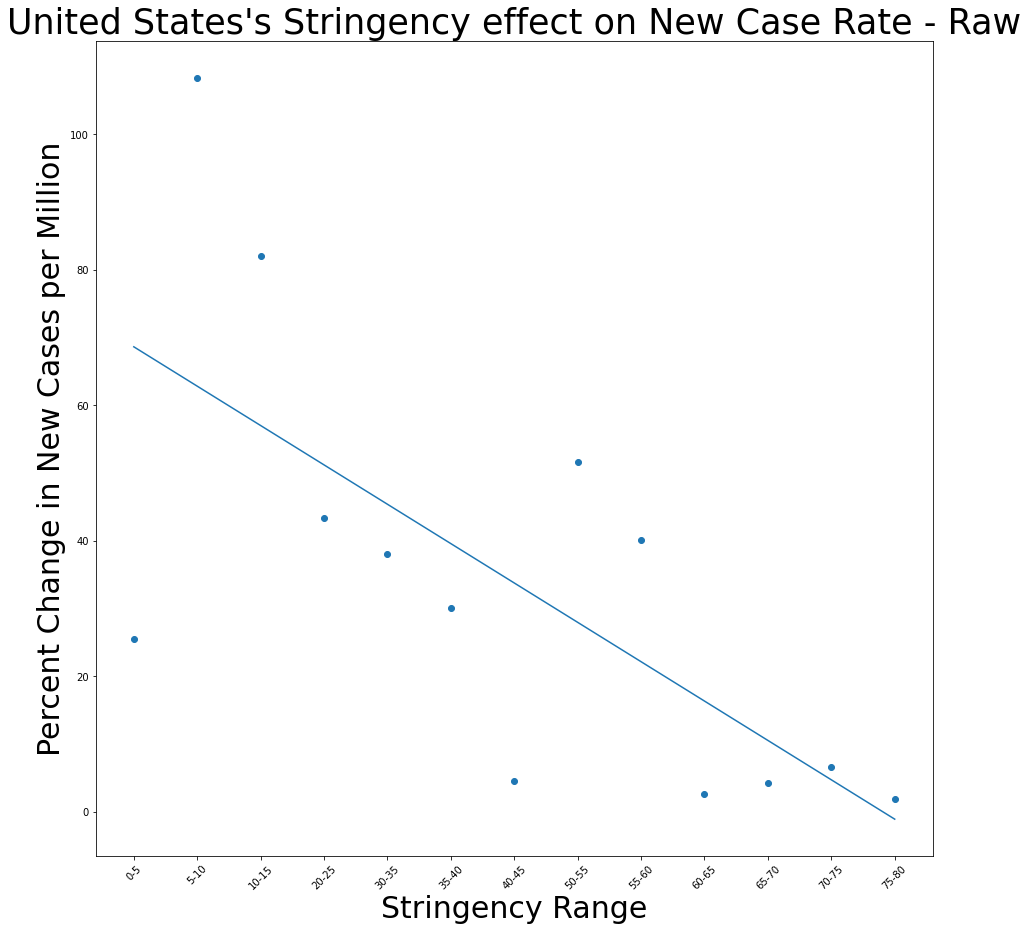

The correlation coefficient between stringency and the change in New Cases is -0.6621778557824558


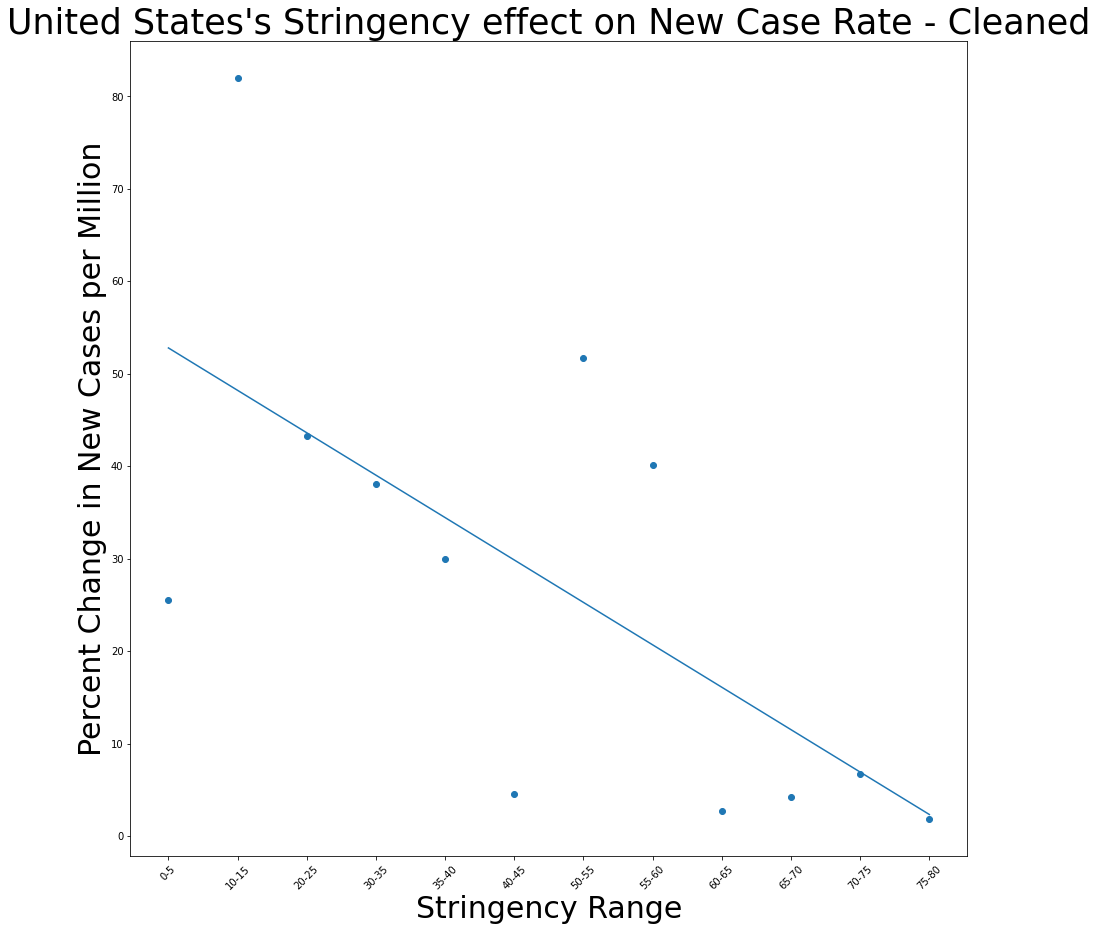

In [226]:
us_by_SG = total_Change_SG(stringency_US)
total_Change_SGClean(us_by_SG,stringency_US)


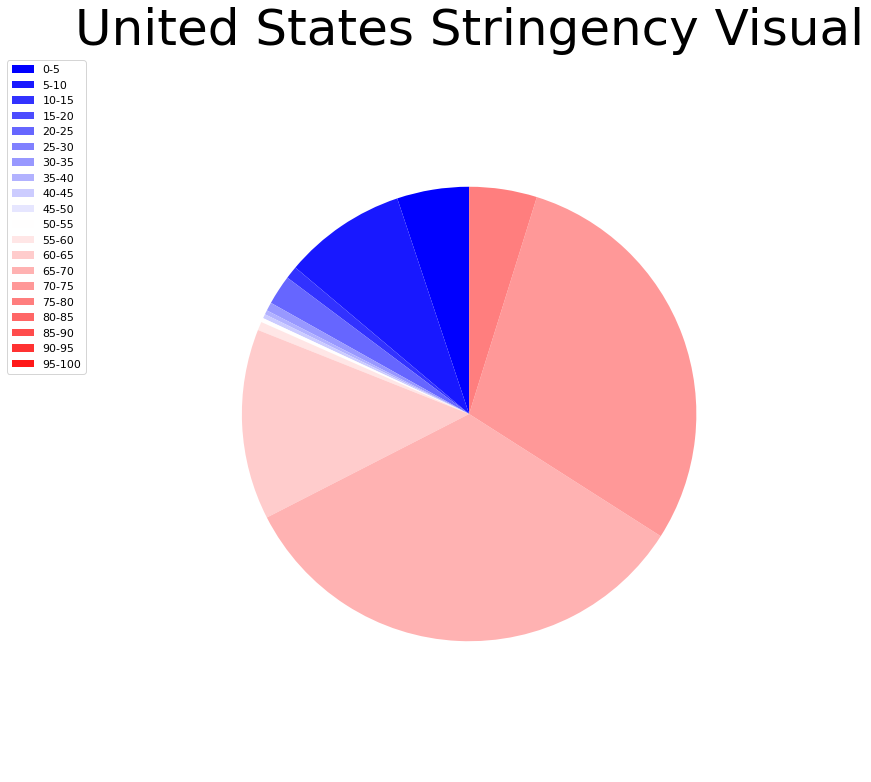

In [227]:
pie_stringency(us_groupby_SG,stringency_US)

# China

In [228]:
stringency_CN = stringency_df.loc[(stringency_df['location'] == 'China') &
                    (stringency_df['total_vaccinations'] == 0),:]
cn_groupby_SG, stringency_CN  = stringency_count(stringency_CN)
stringency_CN.head(5)

continent location       date  total_cases  new_cases  reproduction_rate  \
0       Asia    China 2020-01-22        547.0        0.0                0.0   
..       ...      ...        ...          ...        ...                ...   

    new_cases_smoothed_per_million  stringency_index  total_vaccinations  \
0                              0.0             26.39                 0.0   
..                             ...               ...                 ...   

   Stringency Group  Change in New Cases  Stringency range count  
0             25-30                  0.0                       1  
..              ...                  ...                     ...  

[5 rows x 12 columns]

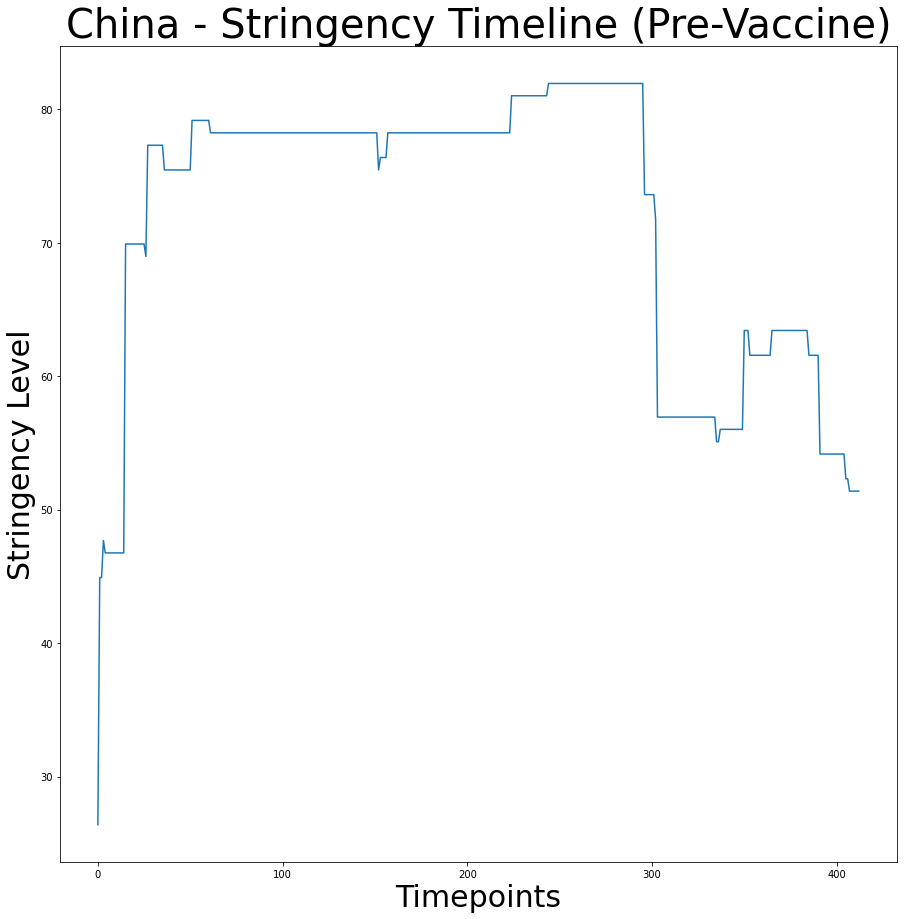

In [229]:
graph_stringency_country(stringency_CN)

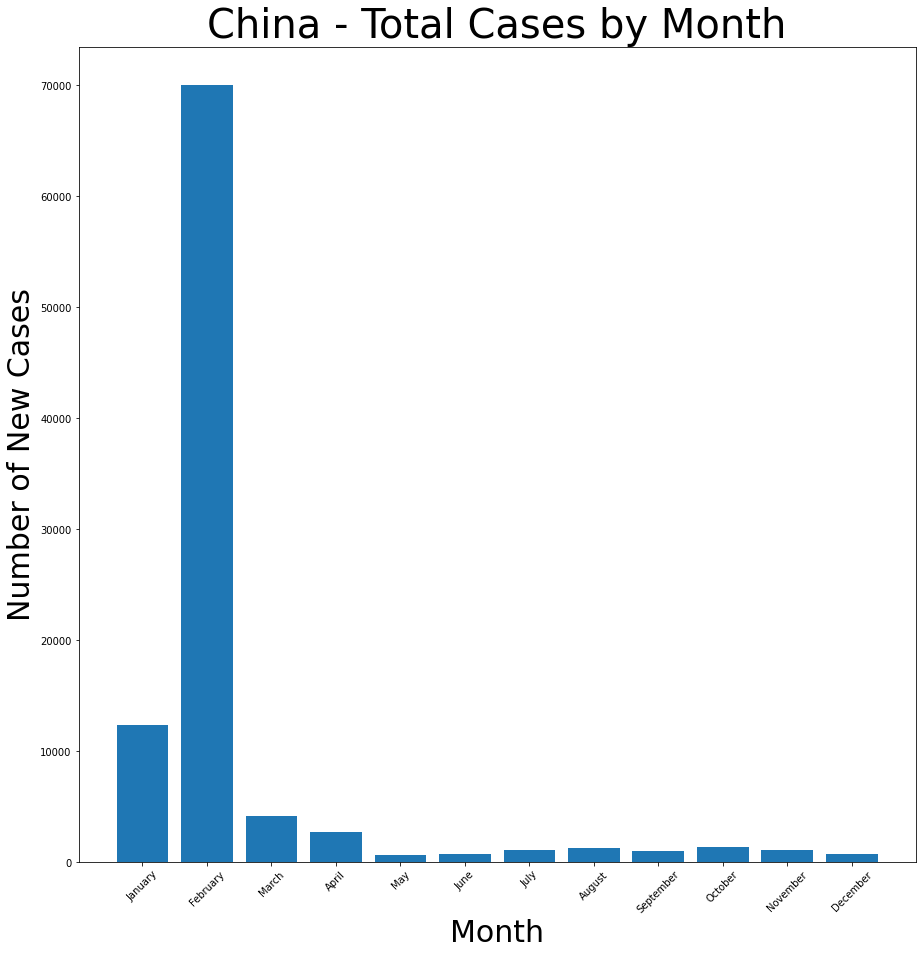

In [230]:
total_cases_Monthly(stringency_CN)

The correlation coefficient between stringency and the change in New Cases is 0.279171136691744


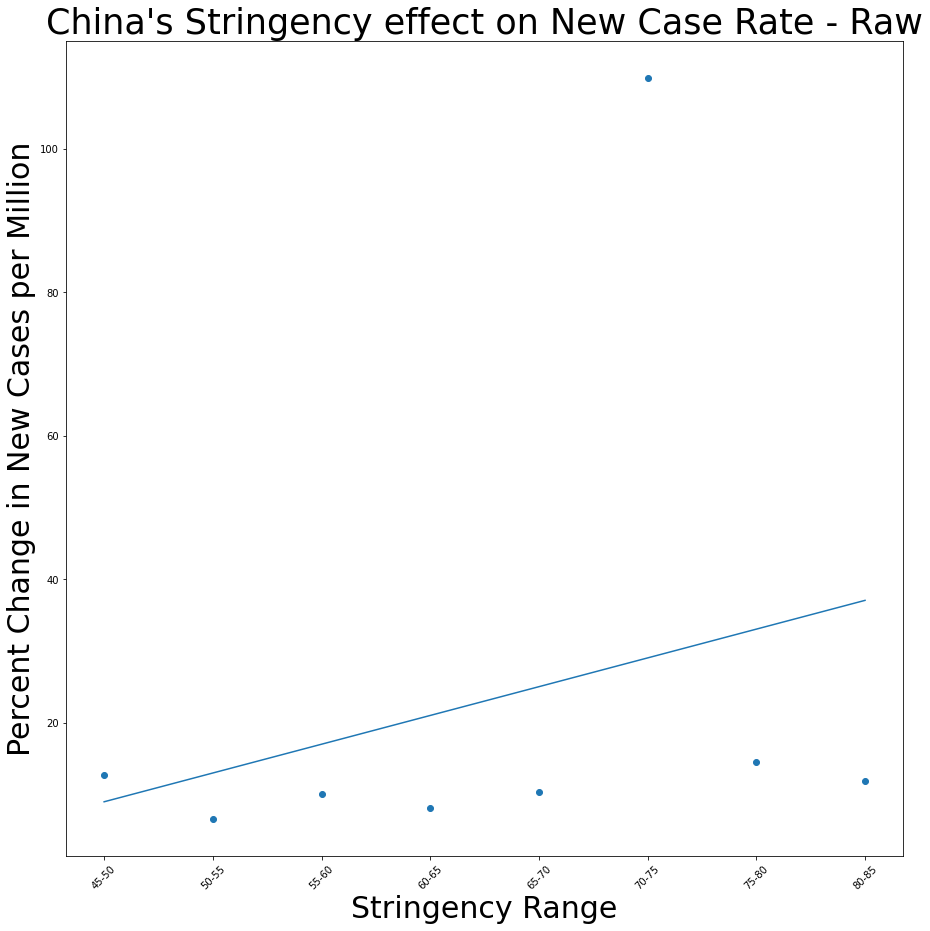

The correlation coefficient between stringency and the change in New Cases is 0.40212696330029113


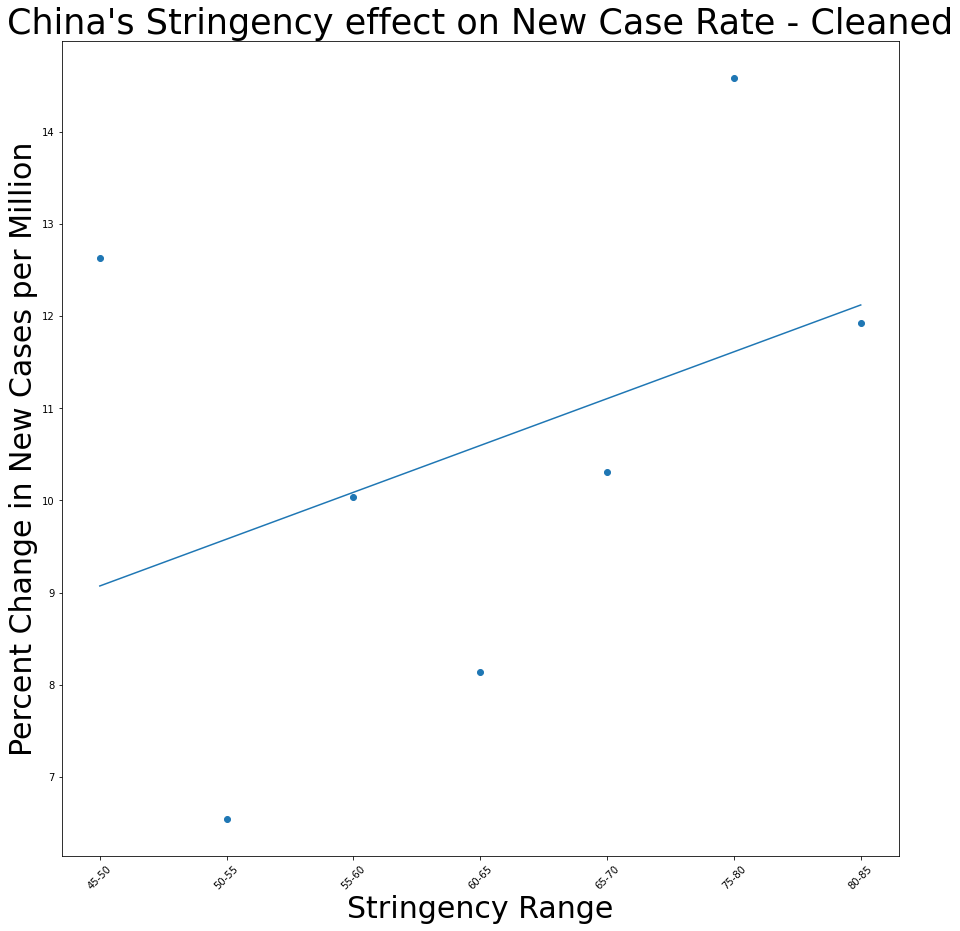

In [231]:
cn_by_SG = total_Change_SG(stringency_CN)
total_Change_SGClean(cn_by_SG,stringency_CN)

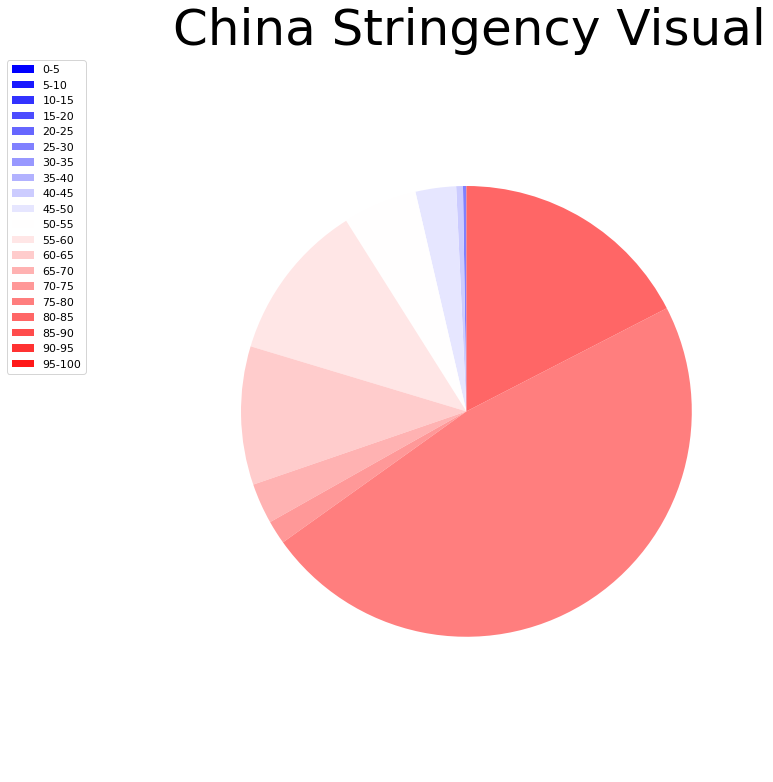

In [232]:
pie_stringency(cn_groupby_SG,stringency_CN)

# India

In [233]:
stringency_IN = stringency_df.loc[(stringency_df['location'] == 'India') &
                    (stringency_df['total_vaccinations'] == 0) &
                    (stringency_df['date'] < '2022-07-18'),:]
in_groupby_SG, stringency_IN  = stringency_count(stringency_IN)
stringency_IN.tail(5)


continent location       date  total_cases  new_cases  reproduction_rate  \
366      Asia    India 2021-01-14   10527683.0    15590.0               0.88   
..        ...      ...        ...          ...        ...                ...   

     new_cases_smoothed_per_million  stringency_index  total_vaccinations  \
366                          11.597             68.98                 0.0   
..                              ...               ...                 ...   

    Stringency Group  Change in New Cases  Stringency range count  
366            65-70            -2.183548                      57  
..               ...                  ...                     ...  

[5 rows x 12 columns]

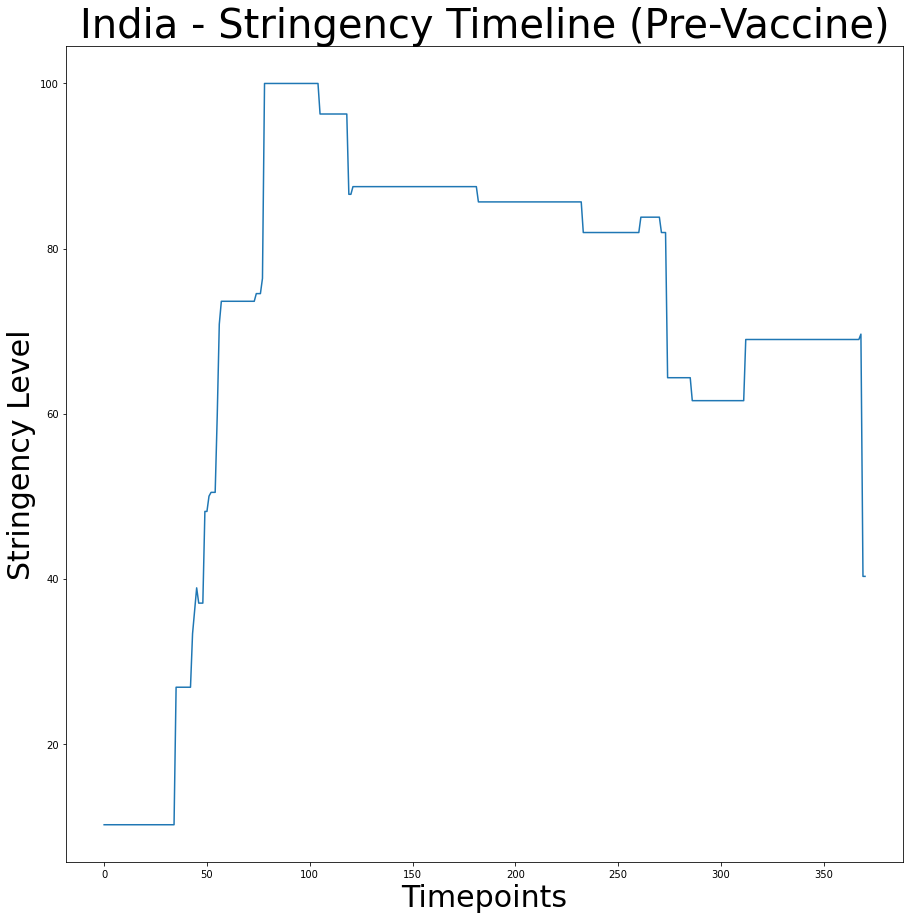

In [234]:
graph_stringency_country(stringency_IN)

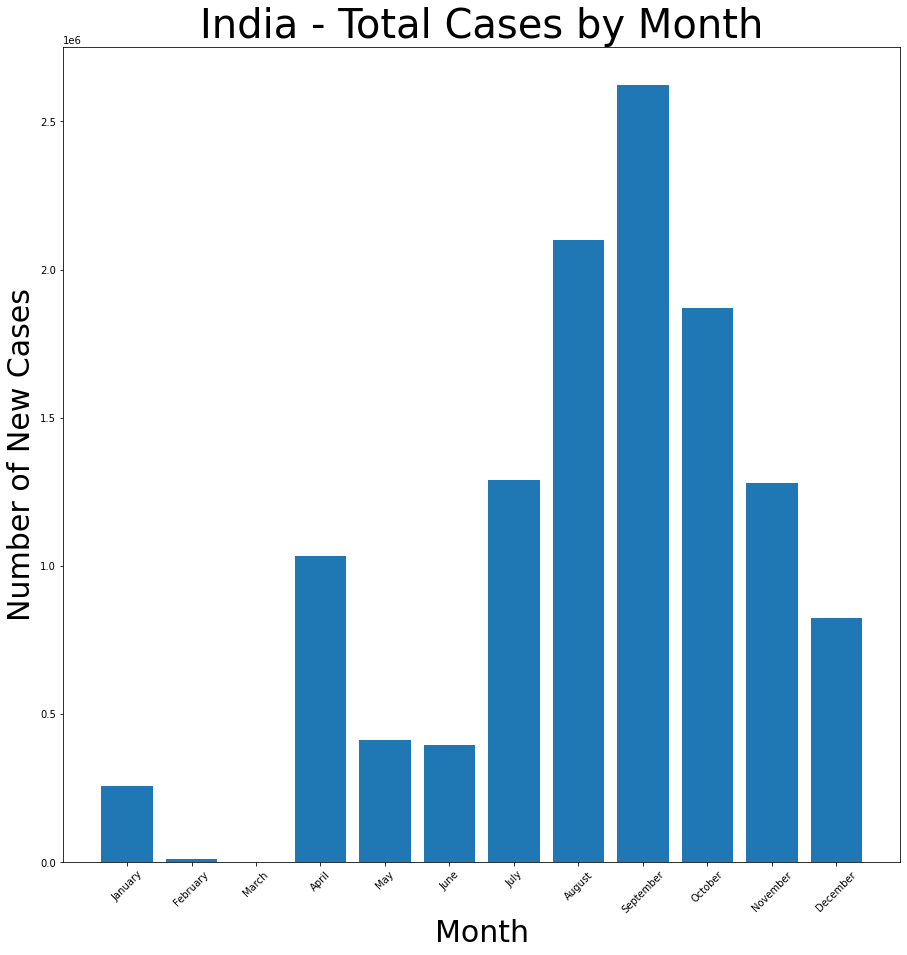

In [235]:
total_cases_Monthly(stringency_IN)

The correlation coefficient between stringency and the change in New Cases is -0.30110302648929915


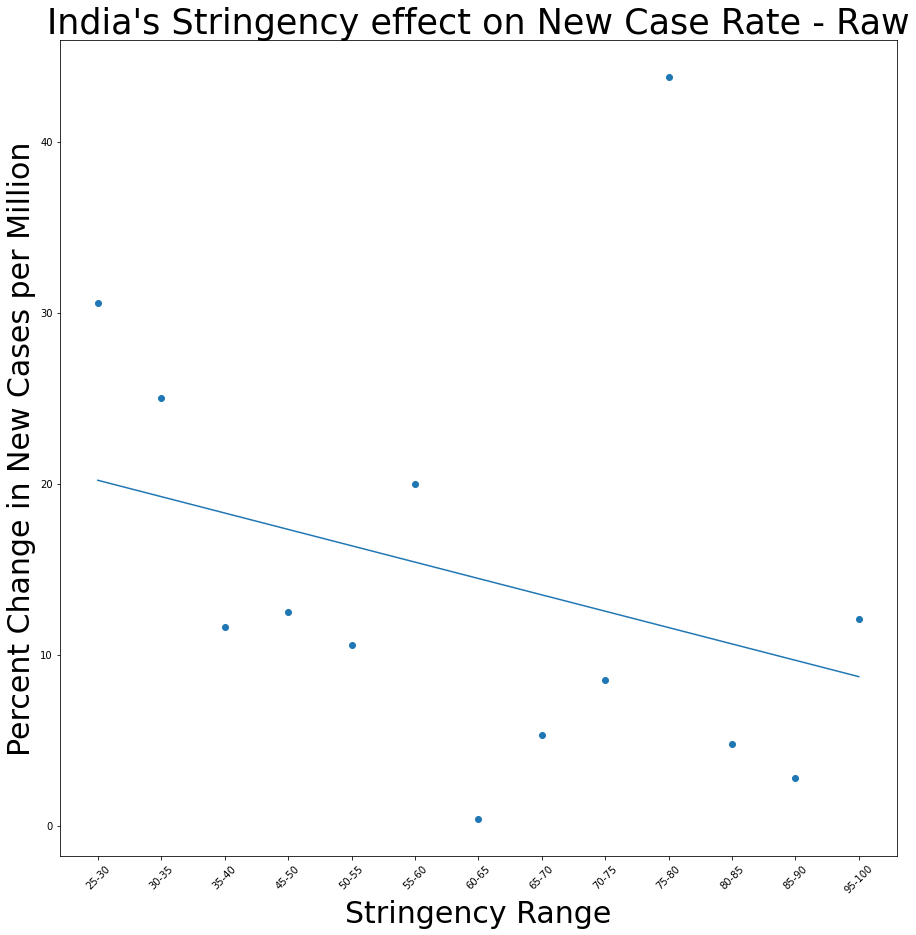

The correlation coefficient between stringency and the change in New Cases is -0.7021244023802389


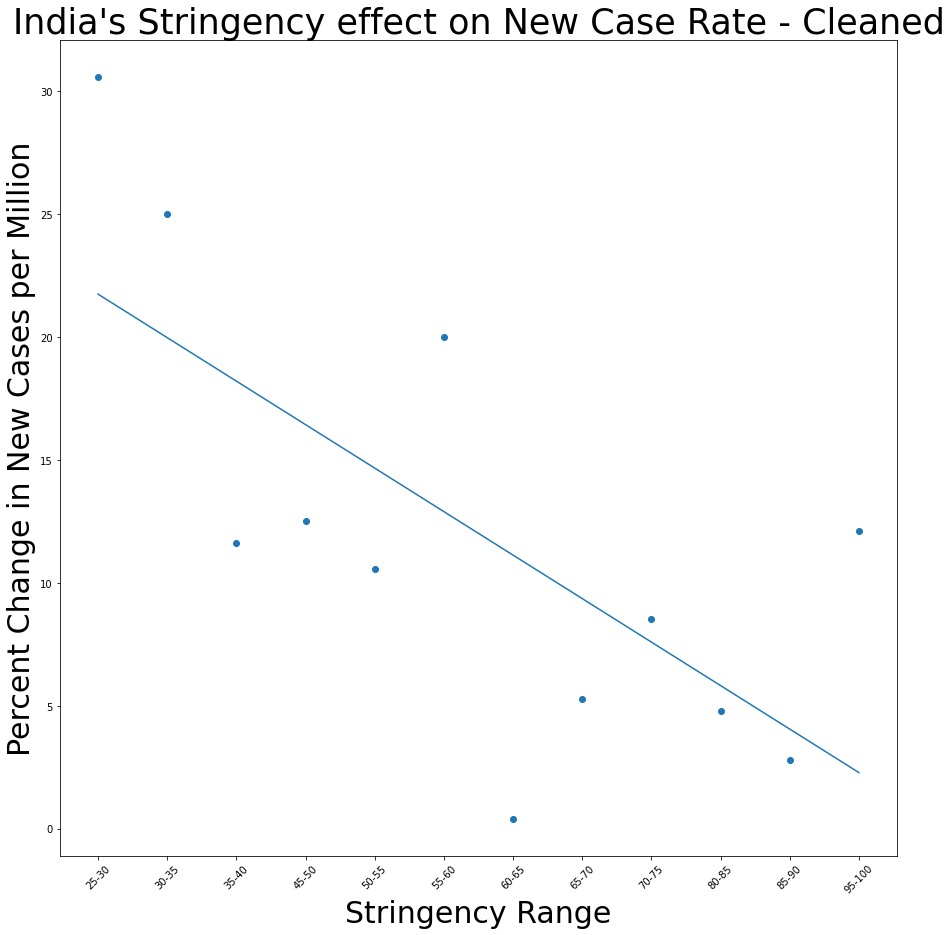

In [236]:
in_by_SG = total_Change_SG(stringency_IN)
total_Change_SGClean(in_by_SG,stringency_IN)


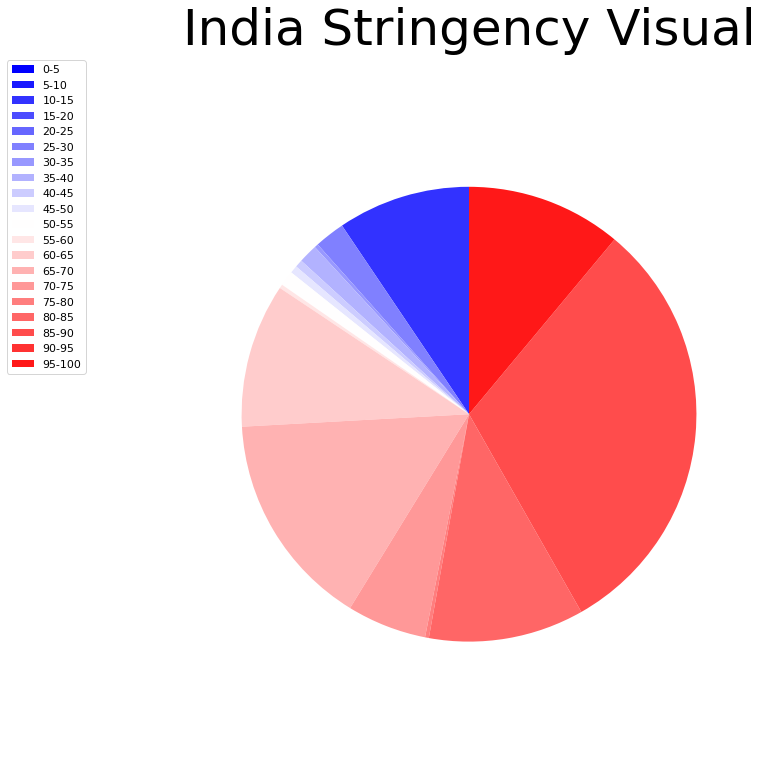

In [237]:
pie_stringency(in_groupby_SG,stringency_IN)

# Nigeria

In [238]:
stringency_NG = stringency_df.loc[(stringency_df['location'] == 'Nigeria') &
                    (stringency_df['total_vaccinations'] == 0),:]
ng_groupby_SG, stringency_NG  = stringency_count(stringency_NG)


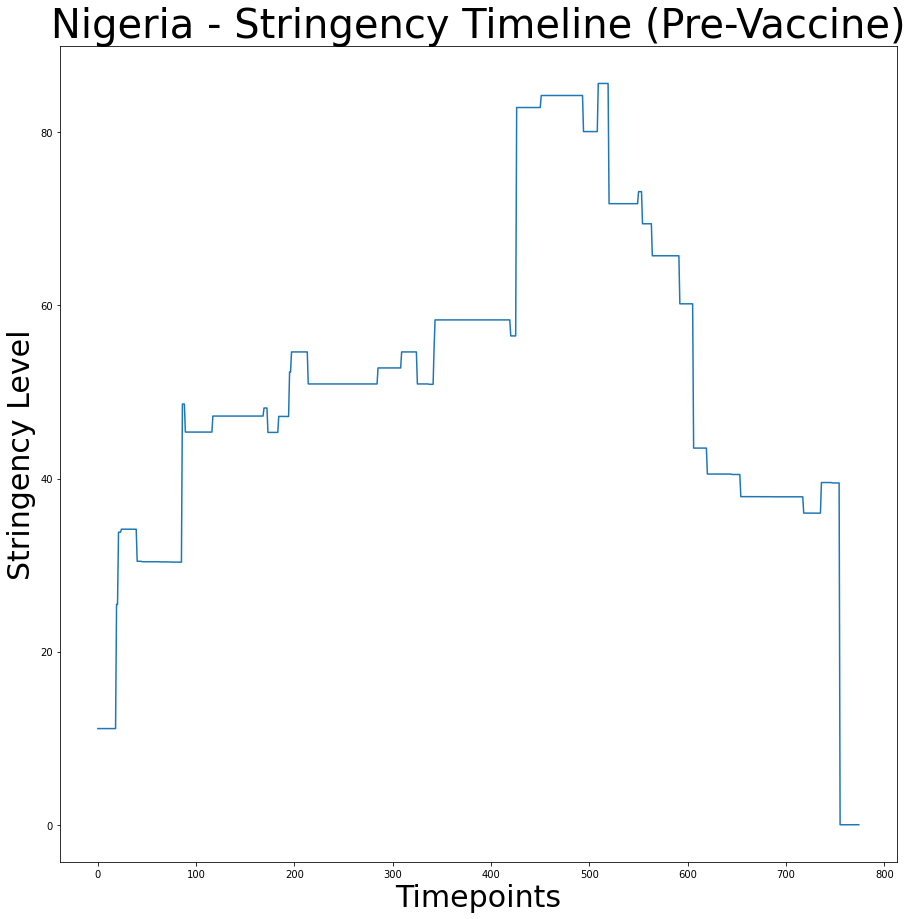

In [239]:
graph_stringency_country(stringency_NG)

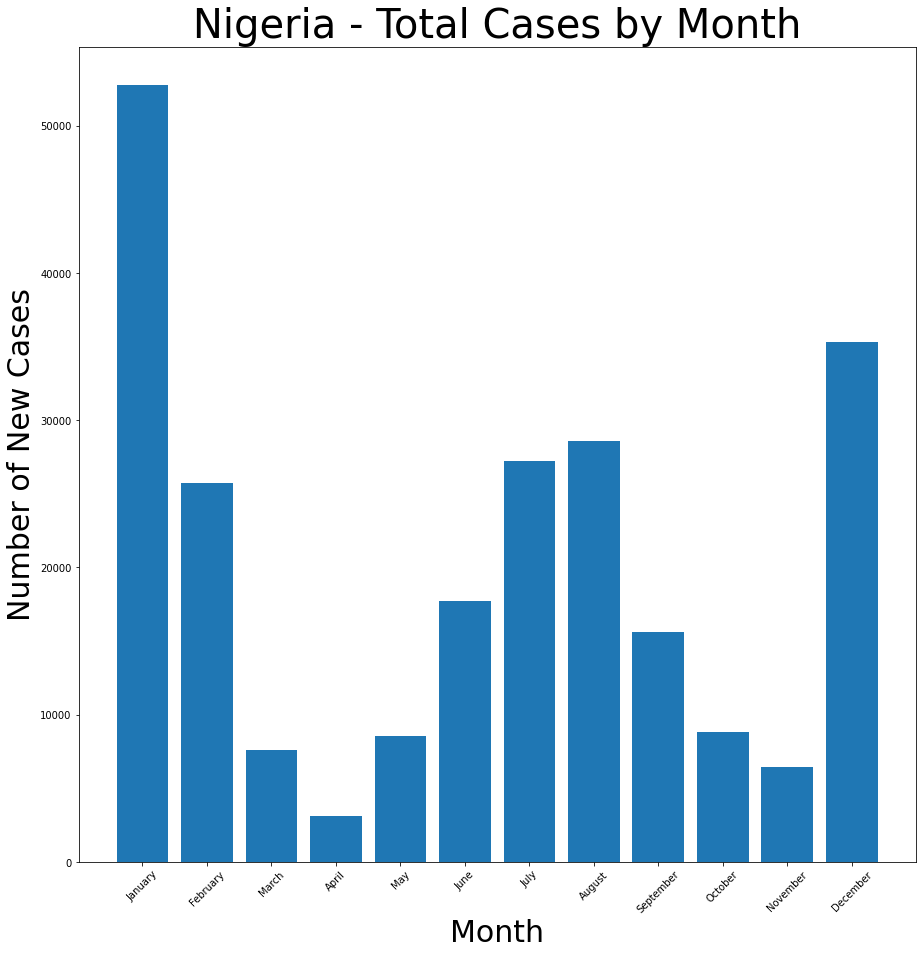

In [240]:
total_cases_Monthly(stringency_NG)

The correlation coefficient between stringency and the change in New Cases is -0.5305575880154307


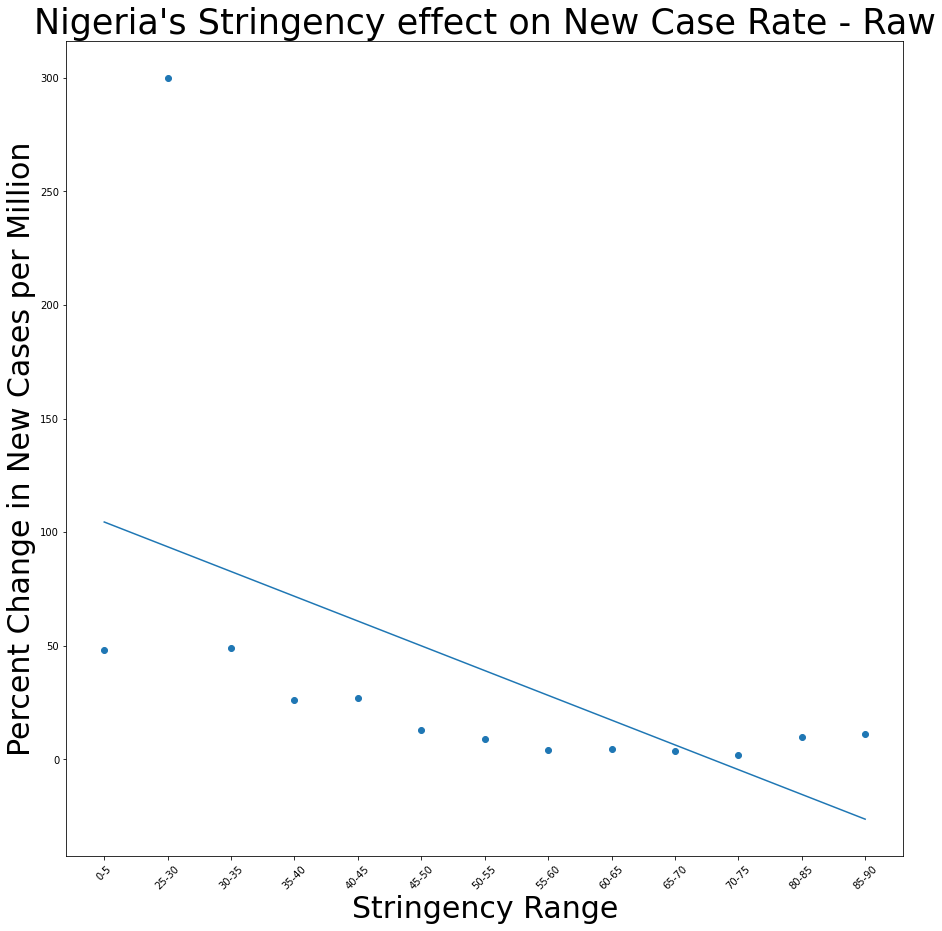

The correlation coefficient between stringency and the change in New Cases is -0.8129631781951631


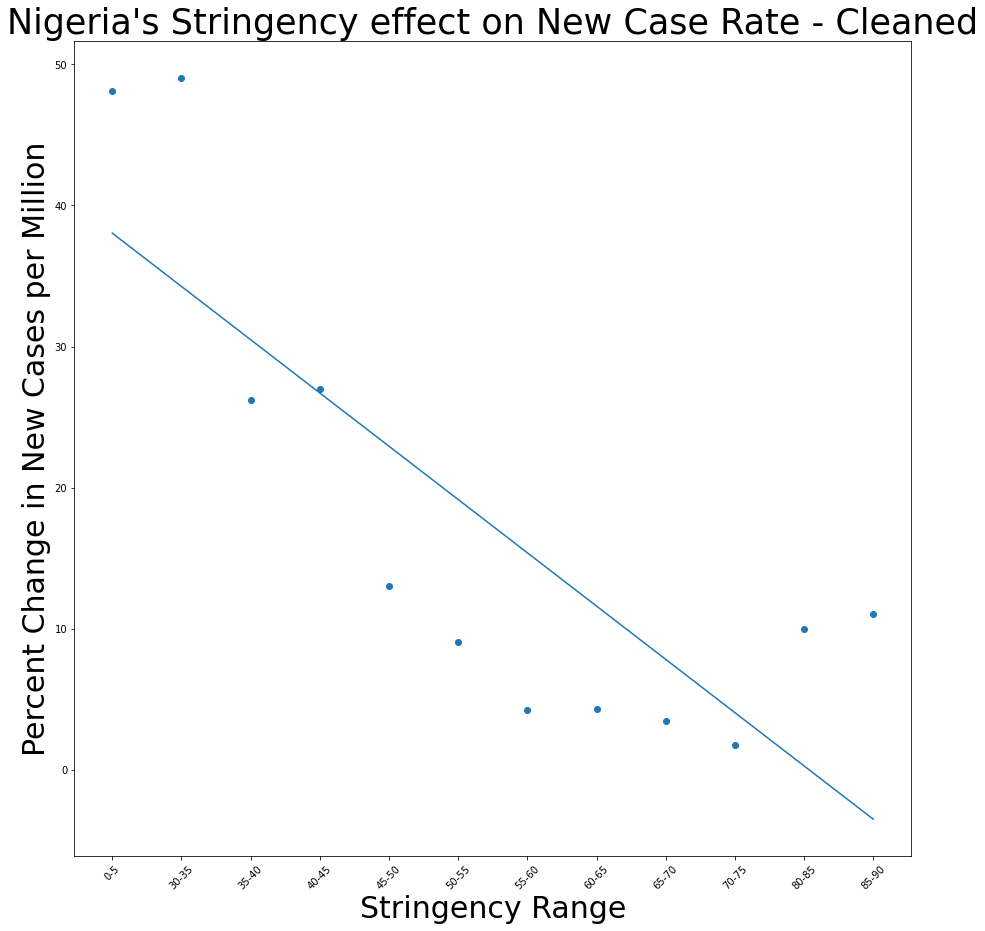

In [241]:
ng_by_SG = total_Change_SG(stringency_NG)
total_Change_SGClean(ng_by_SG,stringency_NG)

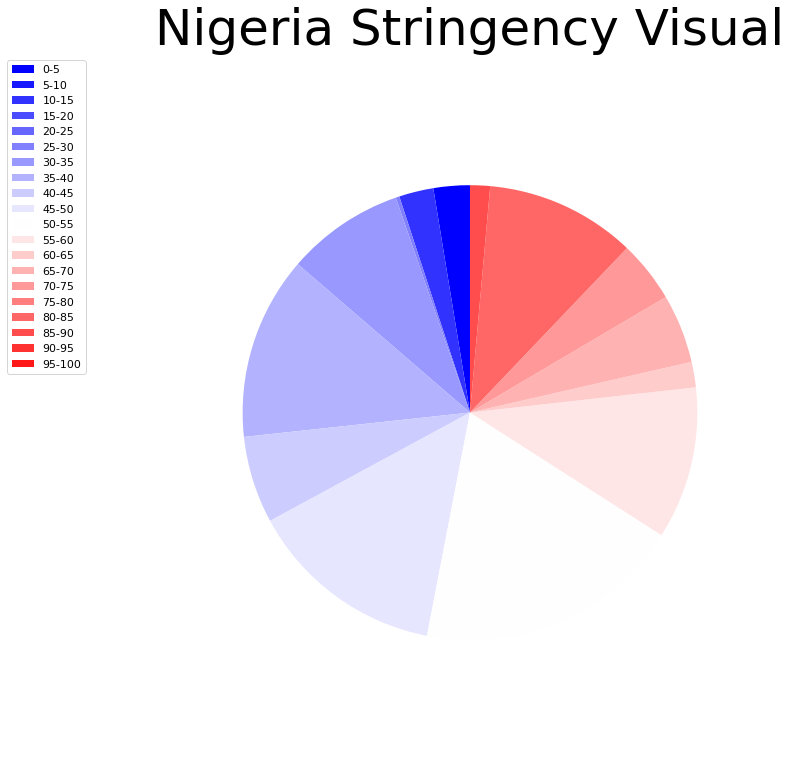

In [242]:
pie_stringency(ng_groupby_SG,stringency_NG)

# Russia

In [243]:
stringency_RS = stringency_df.loc[(stringency_df['location'] == 'Russia') &
                    (stringency_df['total_vaccinations'] == 0),:]
rs_groupby_SG, stringency_RS  = stringency_count(stringency_RS)
stringency_RS.tail()

continent location       date  total_cases  new_cases  reproduction_rate  \
511    Europe   Russia 2022-08-01   18341459.0    10673.0               1.46   
..        ...      ...        ...          ...        ...                ...   

     new_cases_smoothed_per_million  stringency_index  total_vaccinations  \
511                          71.761               0.0                 0.0   
..                              ...               ...                 ...   

    Stringency Group  Change in New Cases  Stringency range count  
511              0-5             6.101392                      14  
..               ...                  ...                     ...  

[5 rows x 12 columns]

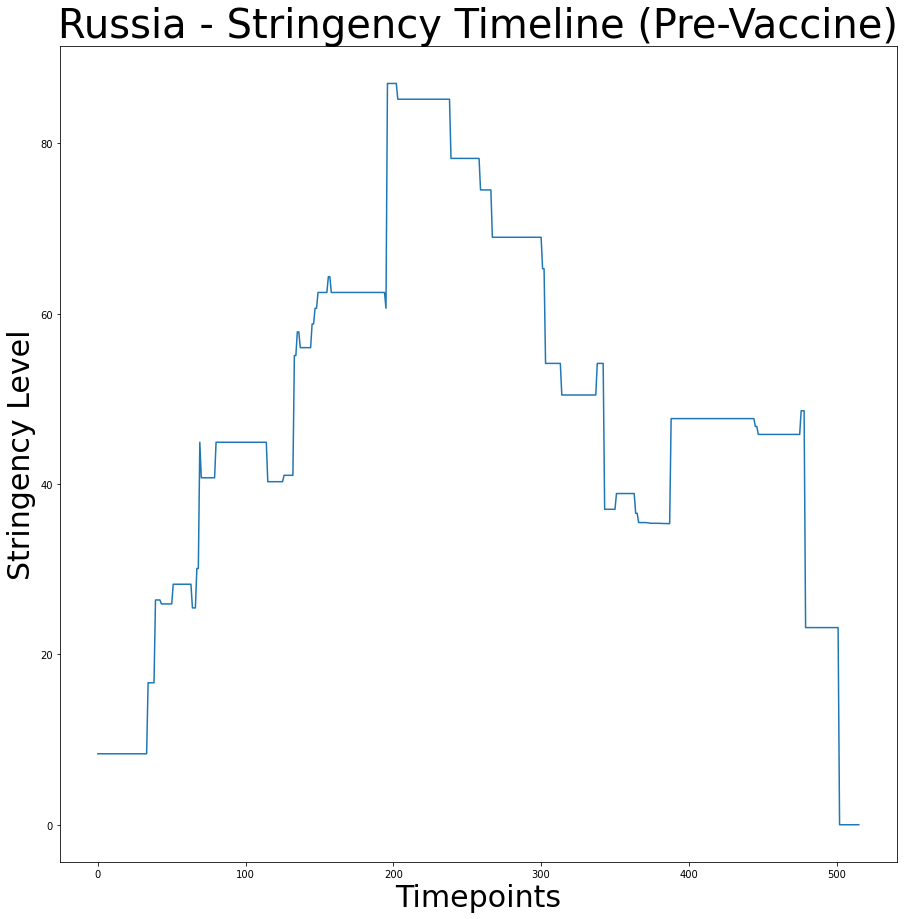

In [244]:
graph_stringency_country(stringency_RS)

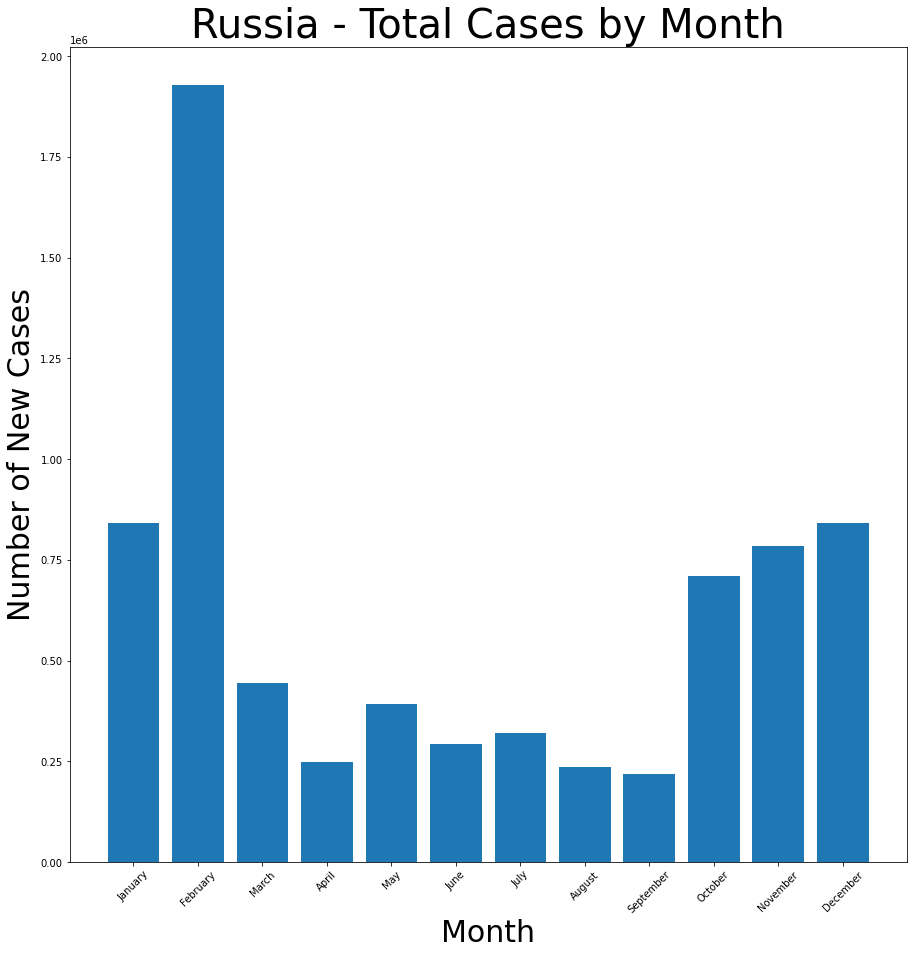

In [245]:
total_cases_Monthly(stringency_RS)

The correlation coefficient between stringency and the change in New Cases is -0.39343733341482423


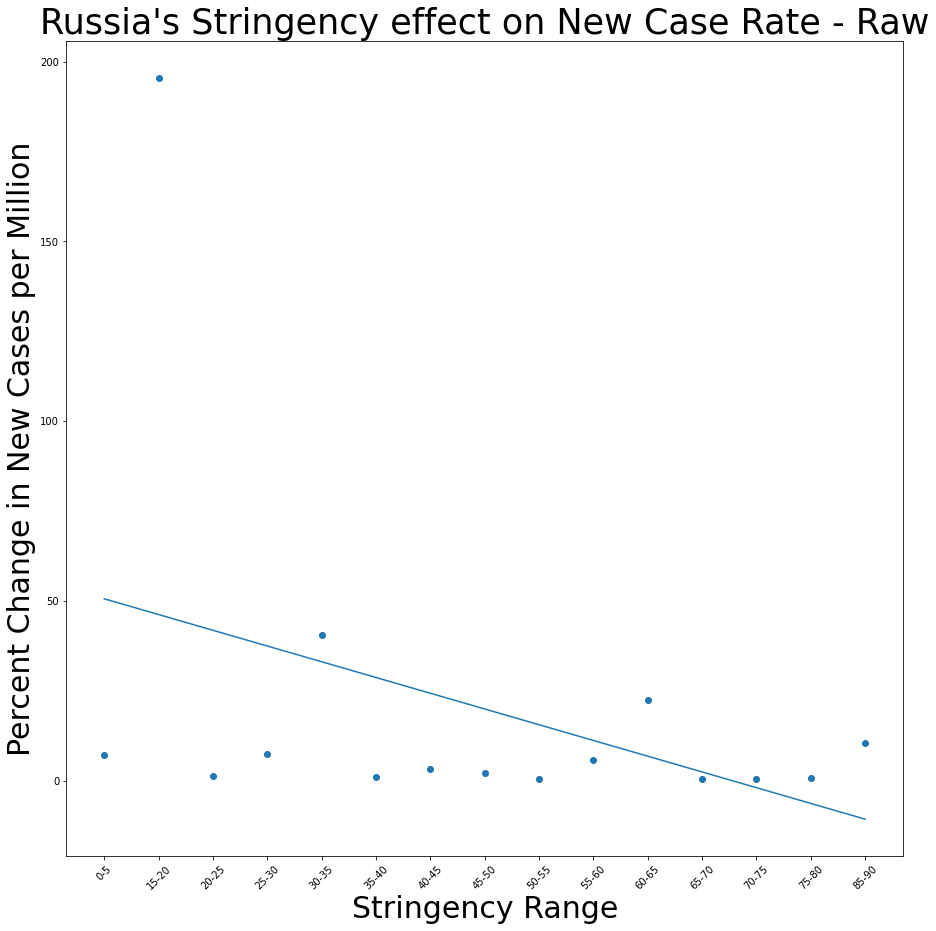

The correlation coefficient between stringency and the change in New Cases is -0.0577517867771135


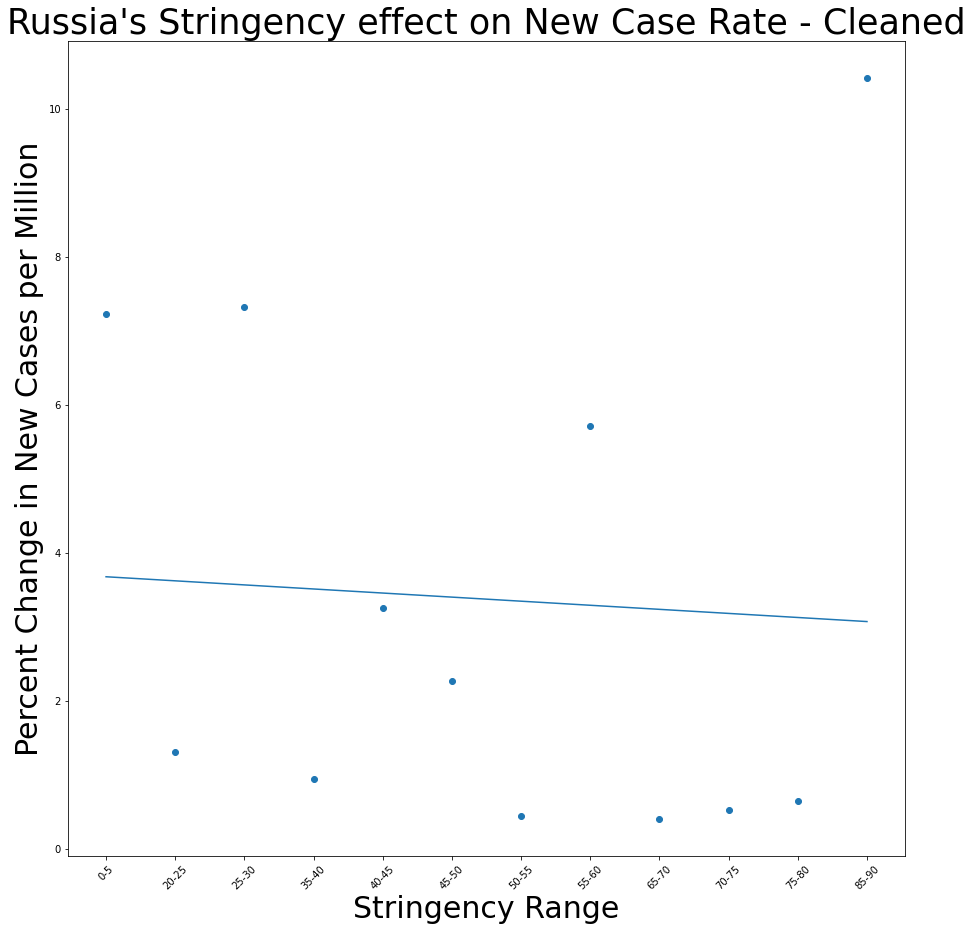

In [246]:
rs_by_SG = total_Change_SG(stringency_RS)
total_Change_SGClean(rs_by_SG,stringency_RS)

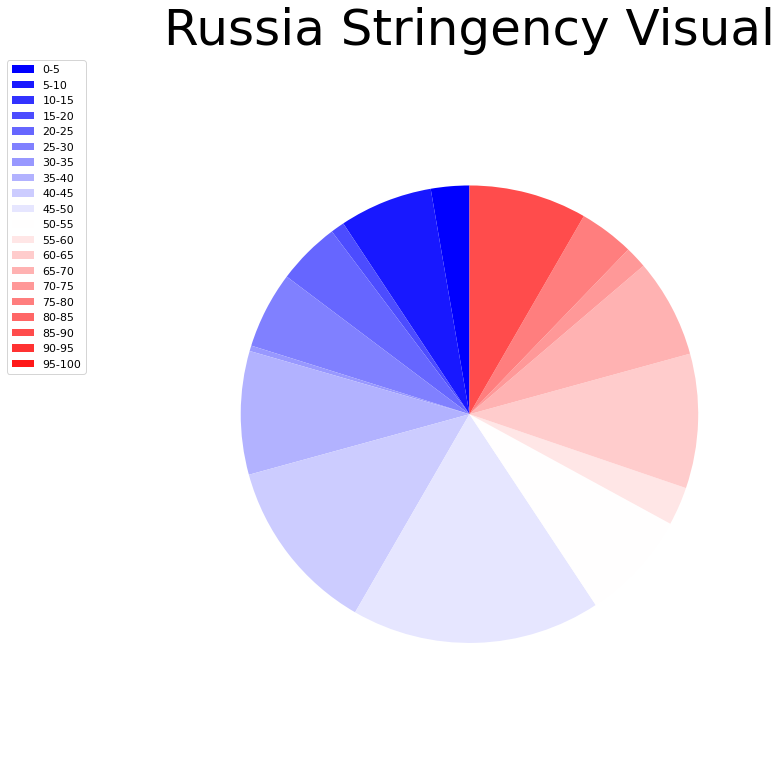

In [247]:
pie_stringency(rs_groupby_SG,stringency_RS)

# Sweden

In [248]:
stringency_Sweden = stringency_df.loc[(stringency_df['location'] == 'Sweden') &
                    (stringency_df['total_vaccinations'] == 0),:]

sw_groupby_SG, stringency_Sweden  = stringency_count(stringency_Sweden)

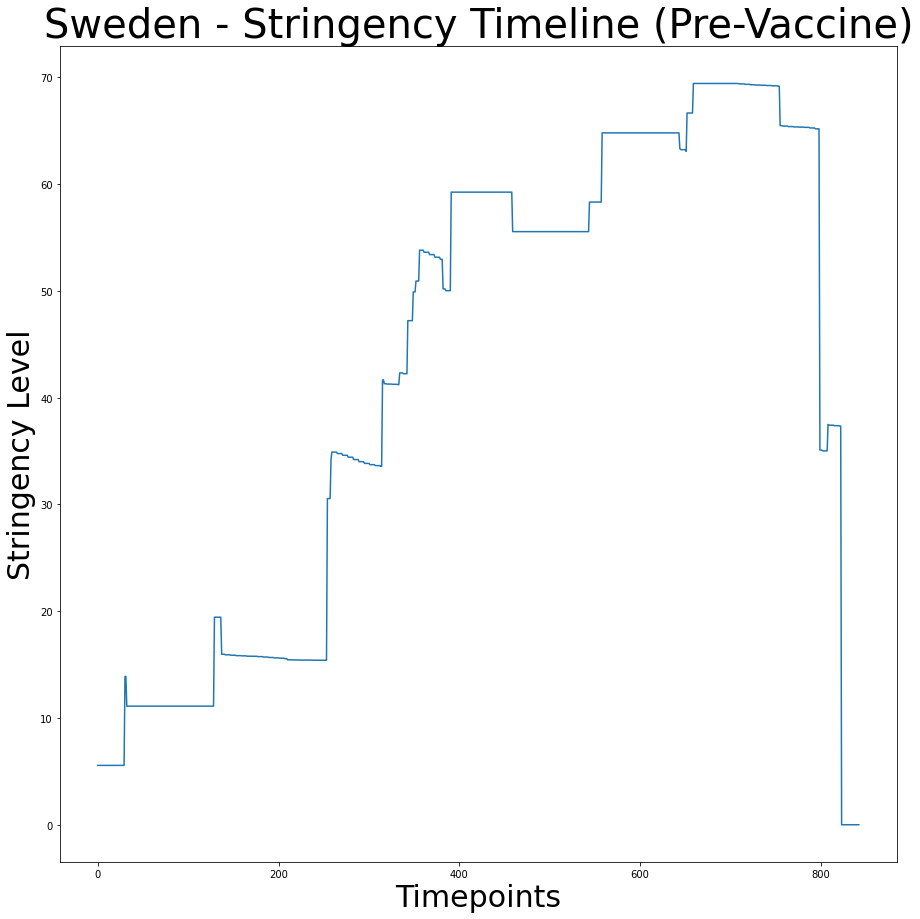

In [249]:
graph_stringency_country(stringency_Sweden)

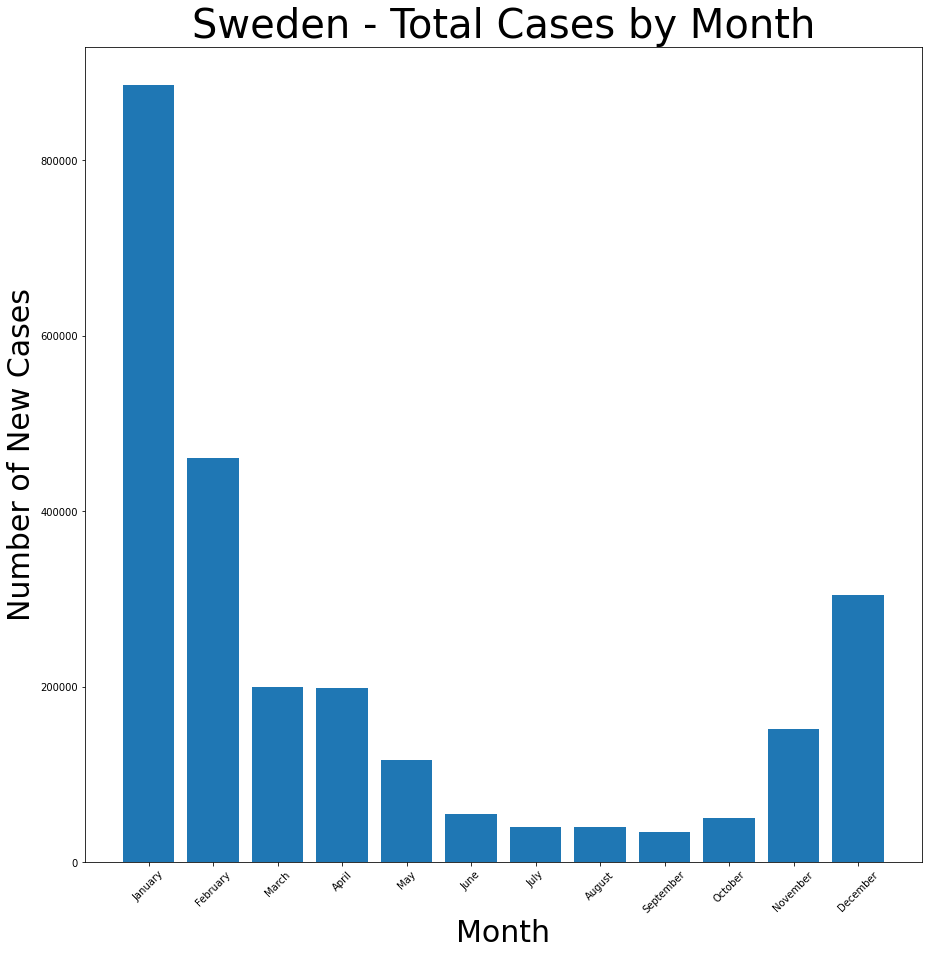

In [250]:
total_cases_Monthly(stringency_Sweden)

The correlation coefficient between stringency and the change in New Cases is -0.4001875768958538


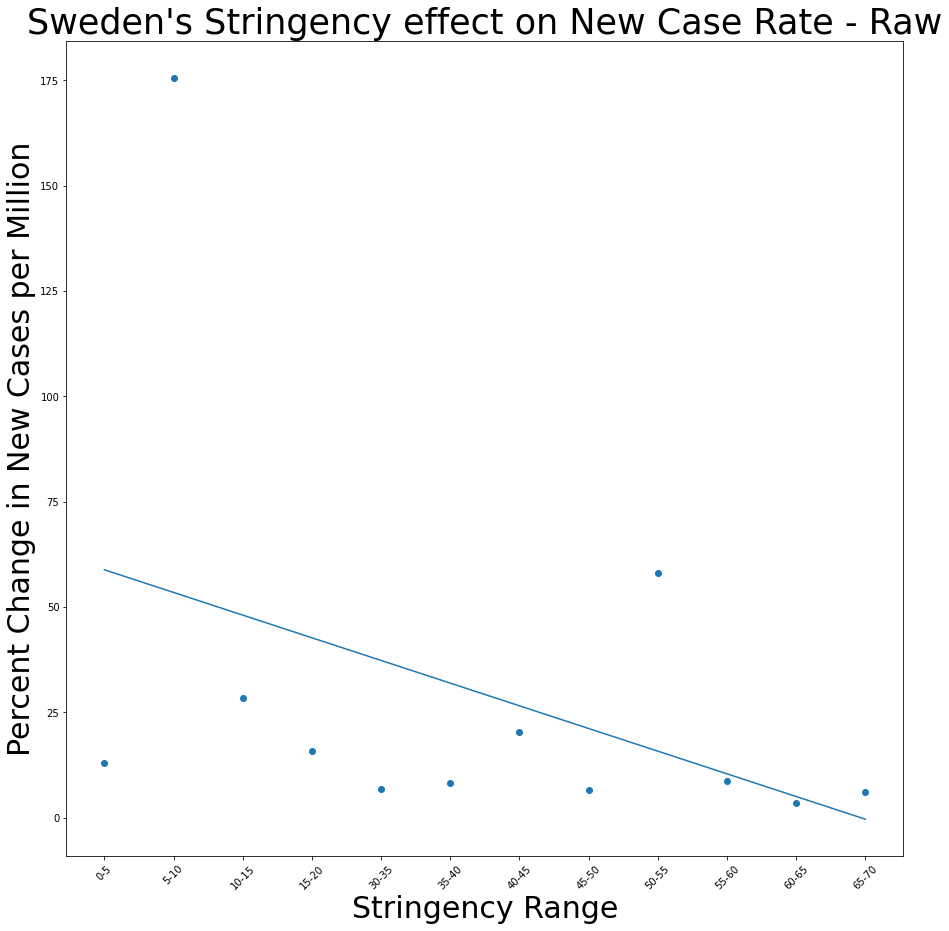

The correlation coefficient between stringency and the change in New Cases is -0.6132633369782075


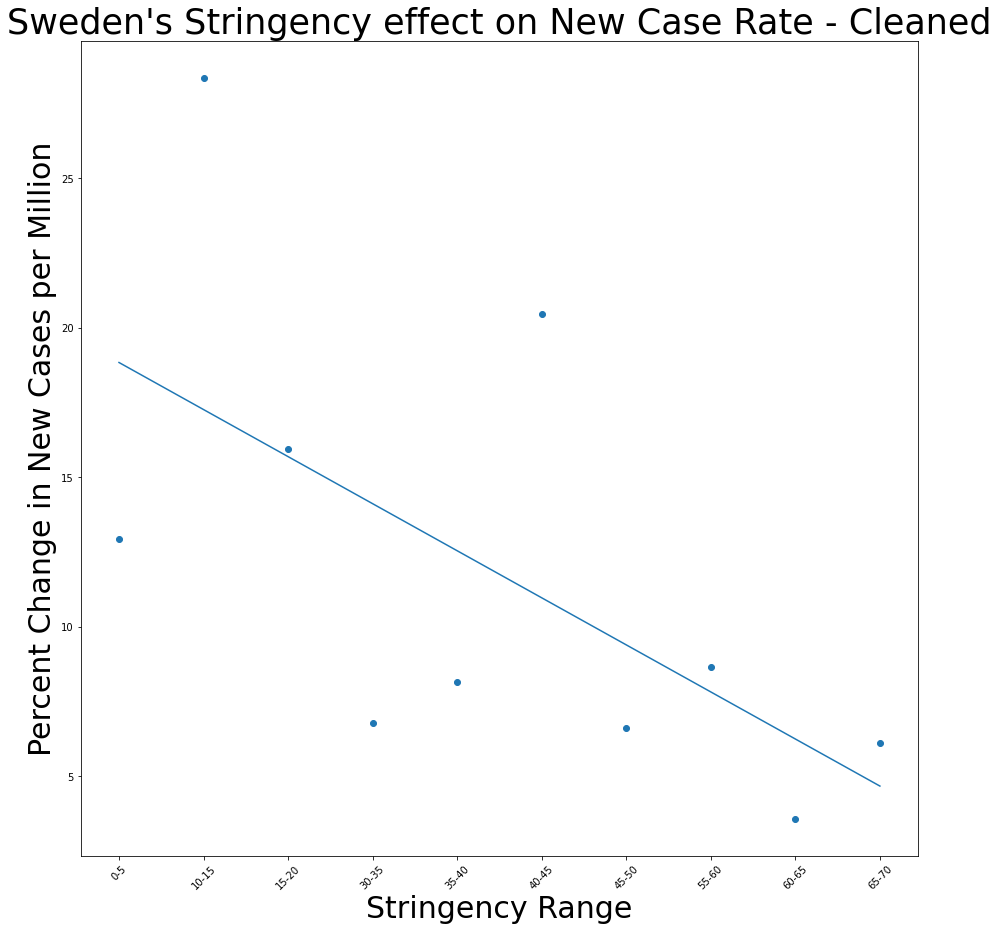

In [251]:
sweden_by_SG = total_Change_SG(stringency_Sweden)
total_Change_SGClean(sweden_by_SG, stringency_Sweden)

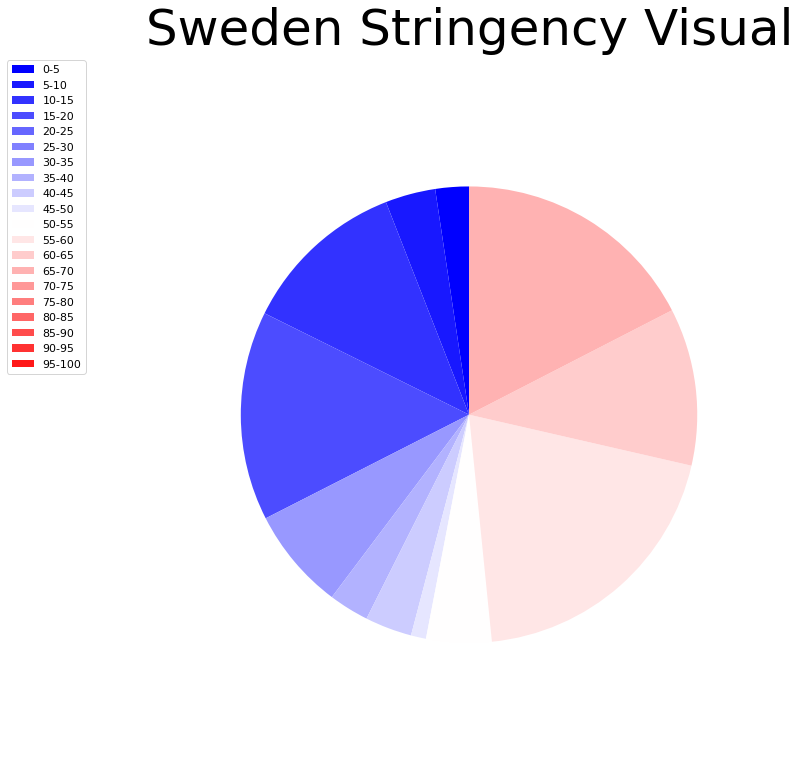

In [252]:
pie_stringency(sw_groupby_SG,stringency_Sweden)

# Its evident from this data research that as governments around the world increased their stringency measures, the rate at which new cases grew decreased. Countries who spent more time in medium stringency ranges showcased that their small time in higher stringency ranges proved impactful, Nigeria leading this example.

# Vaccination influence on Covid-19 trends 

# -------------------------------

# Identify The Most Populated Country From Each Continent

In [253]:
covid_data_clean = covid_data.fillna(0)

In [254]:
# Select Required Columns
population_data = covid_data_clean[['continent','location','population' ]]

In [255]:
# Drop Dulicate Population Values
population_data = population_data.drop_duplicates(subset=['population'])

# Sort Population Collumn by Value 
population_data = population_data.sort_values(by='population', ascending=False)

In [256]:
# display one row only COMMENTED OUT AFTER RUNNING CELLS 
pd.set_option('display.max_rows', 1) 

In [257]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Africa = population_data['continent'] == 'Africa'

Covid_Data_Africa = population_data[Covid_Data_Africa]
Covid_Data_Africa

continent location   population
135413    Africa  Nigeria  213401323.0
...          ...      ...          ...

[56 rows x 3 columns]

In [258]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Asia = population_data['continent'] == 'Asia'

Covid_Data_Asia = population_data[Covid_Data_Asia]
Covid_Data_Asia

continent location    population
38236      Asia    China  1.425893e+09
...         ...      ...           ...

[50 rows x 3 columns]

In [259]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Europe = population_data['continent'] == 'Europe'

Covid_Data_Europe = population_data[Covid_Data_Europe]
Covid_Data_Europe

continent location   population
153934    Europe   Russia  145102755.0
...          ...      ...          ...

[51 rows x 3 columns]

In [260]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_NorthAmerica = population_data['continent'] == 'North America'

Covid_Data_NorthAmerica = population_data[Covid_Data_NorthAmerica]
Covid_Data_NorthAmerica

continent       location   population
195365  North America  United States  336997624.0
...               ...            ...          ...

[37 rows x 3 columns]

In [261]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_SouthAmerica = population_data['continent'] == 'South America'

Covid_Data_SouthAmerica = population_data[Covid_Data_SouthAmerica]
Covid_Data_SouthAmerica

continent location   population
25828  South America   Brazil  214326223.0
...              ...      ...          ...

[13 rows x 3 columns]

In [262]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Oceania = population_data['continent'] == 'Oceania'

Covid_Data_Oceania = population_data[Covid_Data_Oceania]
Covid_Data_Oceania

continent   location  population
10780   Oceania  Australia  25921089.0
...         ...        ...         ...

[23 rows x 3 columns]

# Select New Columns

In [263]:
covid_data_summary = covid_data[['new_deaths_smoothed_per_million', 'new_cases_smoothed', 'continent', 'location', 'date', 'population', 'total_cases', 'total_tests', 'positive_rate', 'total_vaccinations', 'people_fully_vaccinated' ]]
covid_data_summary.head()

new_deaths_smoothed_per_million  new_cases_smoothed continent  \
0                               NaN                 NaN      Asia   
..                              ...                 ...       ...   

       location        date  population  total_cases  total_tests  \
0   Afghanistan  2020-02-24  40099462.0          5.0          NaN   
..          ...         ...         ...          ...          ...   

    positive_rate  total_vaccinations  people_fully_vaccinated  
0             NaN                 NaN                      NaN  
..            ...                 ...                      ...  

[5 rows x 11 columns]

In [264]:
# Define / Grab the data contained within the "location" column | DataFrames

nigeria = covid_data_summary.loc[(covid_data_summary['location'] == 'Nigeria'),:]
china = covid_data_summary.loc[(covid_data_summary['location'] == 'China'),:]
russia = covid_data_summary.loc[(covid_data_summary['location'] == 'Russia'),:]
united_states = covid_data_summary.loc[(covid_data_summary['location'] == 'United States'),:]
brazil = covid_data_summary.loc[(covid_data_summary['location'] == 'Brazil'),:]
australia = covid_data_summary.loc[(covid_data_summary['location'] == 'Australia'),:]

In [265]:
# Used to have the x axis display Months
    # .astype - Cast a pandas object to a specified dtype
        # (datetime64[ns, tz]) from ASKBCS assistant * could also use ----> to_datetime() <----  

nigeria['date'] = nigeria['date'].astype('datetime64[ns]')
china['date'] = china['date'].astype('datetime64[ns]')
russia['date'] = russia['date'].astype('datetime64[ns]')
united_states['date'] = united_states['date'].astype('datetime64[ns]')
brazil['date'] = nigeria['date'].astype('datetime64[ns]')
australia['date'] = australia['date'].astype('datetime64[ns]')

c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Jiv\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

# When Was The Vaccine Avaliable For Each Country

In [266]:
# When Was The Vaccine Avaliable For Each Country

# nigeria - March 2021 | 2021-03-15
# china - December 2020 | 2020-12-15
# russia - December 2020 | 2020-12-15
# united_states - December | 2020-12-13
# brazil - Feburary 2021 | ?
# australia - Feburary 2021 | 2021-02-21

In [267]:
# nigeria
nigeria_vacdate = nigeria.loc[(nigeria['total_vaccinations'] > 0), :]
nigeria_vacdate.head()

new_deaths_smoothed_per_million  new_cases_smoothed continent  \
135794                            0.023             284.143    Africa   
...                                 ...                 ...       ...   

       location       date   population  total_cases  total_tests  \
135794  Nigeria 2021-03-15  213401323.0     160895.0    1684305.0   
...         ...        ...          ...          ...          ...   

        positive_rate  total_vaccinations  people_fully_vaccinated  
135794          0.024              8000.0                      NaN  
...               ...                 ...                      ...  

[5 rows x 11 columns]

In [268]:
# china
china_vacdate = china.loc[(china['total_vaccinations'] > 0), :]
china_vacdate.head(1) 

new_deaths_smoothed_per_million  new_cases_smoothed continent location  \
38564                              0.0                22.0      Asia    China   

            date    population  total_cases  total_tests  positive_rate  \
38564 2020-12-15  1.425893e+09      93192.0          NaN            0.0   

       total_vaccinations  people_fully_vaccinated  
38564           1500000.0                      NaN

In [269]:
# russia
russia_vacdate = russia.loc[(russia['total_vaccinations'] > 0), :]
russia_vacdate.head(1) 

new_deaths_smoothed_per_million  new_cases_smoothed continent  \
154253                            3.678           27164.714    Europe   

       location       date   population  total_cases  total_tests  \
154253   Russia 2020-12-15  145102755.0    2682866.0   83867186.0   

        positive_rate  total_vaccinations  people_fully_vaccinated  
154253         0.0568             28500.0                      NaN

In [270]:
# united_states
USA_vacdate = united_states.loc[(united_states['total_vaccinations'] > 0), :]
USA_vacdate.head(1) 

new_deaths_smoothed_per_million  new_cases_smoothed      continent  \
195691                            7.554          218632.571  North America   

             location       date   population  total_cases  total_tests  \
195691  United States 2020-12-13  336997624.0   16408469.0  227276972.0   

        positive_rate  total_vaccinations  people_fully_vaccinated  
195691          0.118             36419.0                   7581.0

In [271]:
# brazil
brazil_vacdate = brazil.loc[(brazil['total_vaccinations'] > 0), :]
brazil_vacdate.head(1) 

new_deaths_smoothed_per_million  new_cases_smoothed      continent  \
26154                            4.488           54612.143  South America   

      location date   population  total_cases  total_tests  positive_rate  \
26154   Brazil  NaT  214326223.0    8492403.0   30244995.0            NaN   

       total_vaccinations  people_fully_vaccinated  
26154               112.0                      NaN

In [272]:
# australia
australia_vacdate = australia.loc[(australia['total_vaccinations'] > 0), :]
australia_vacdate.head(1) 

new_deaths_smoothed_per_million  new_cases_smoothed continent  \
11172                              0.0               4.286   Oceania   

        location       date  population  total_cases  total_tests  \
11172  Australia 2021-02-21  25921089.0      28930.0   14053806.0   

       positive_rate  total_vaccinations  people_fully_vaccinated  
11172            0.0                20.0                      NaN

# PLOT: new deaths smoothed per million

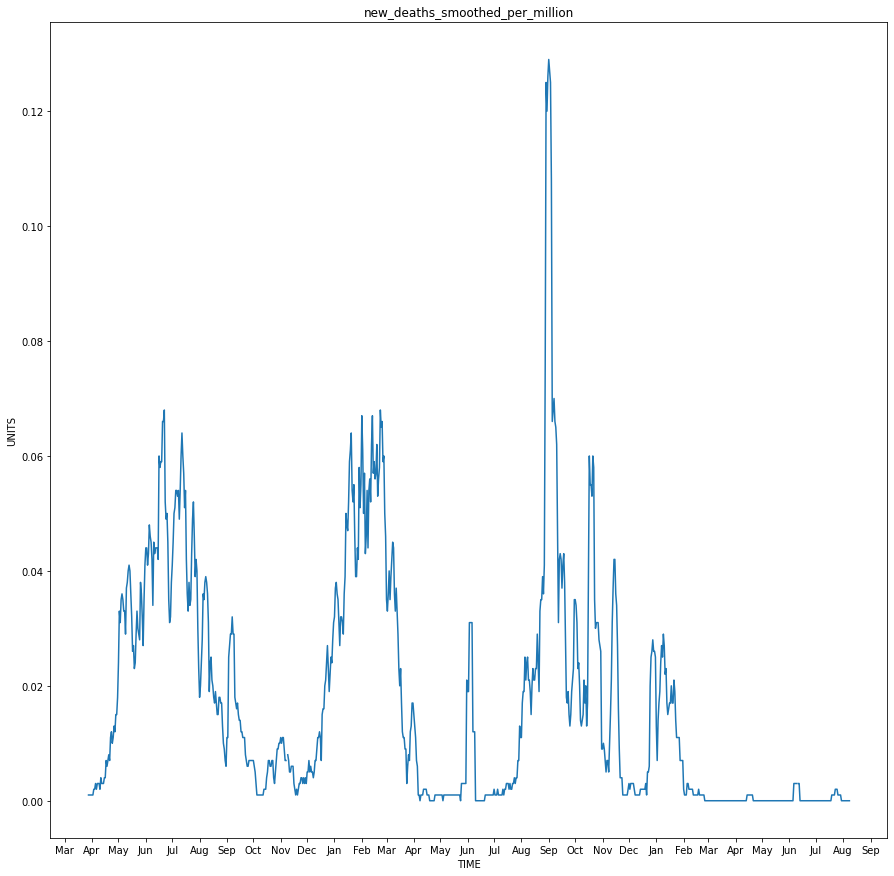

In [273]:
# nigeria
x = nigeria['date']
y = nigeria['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

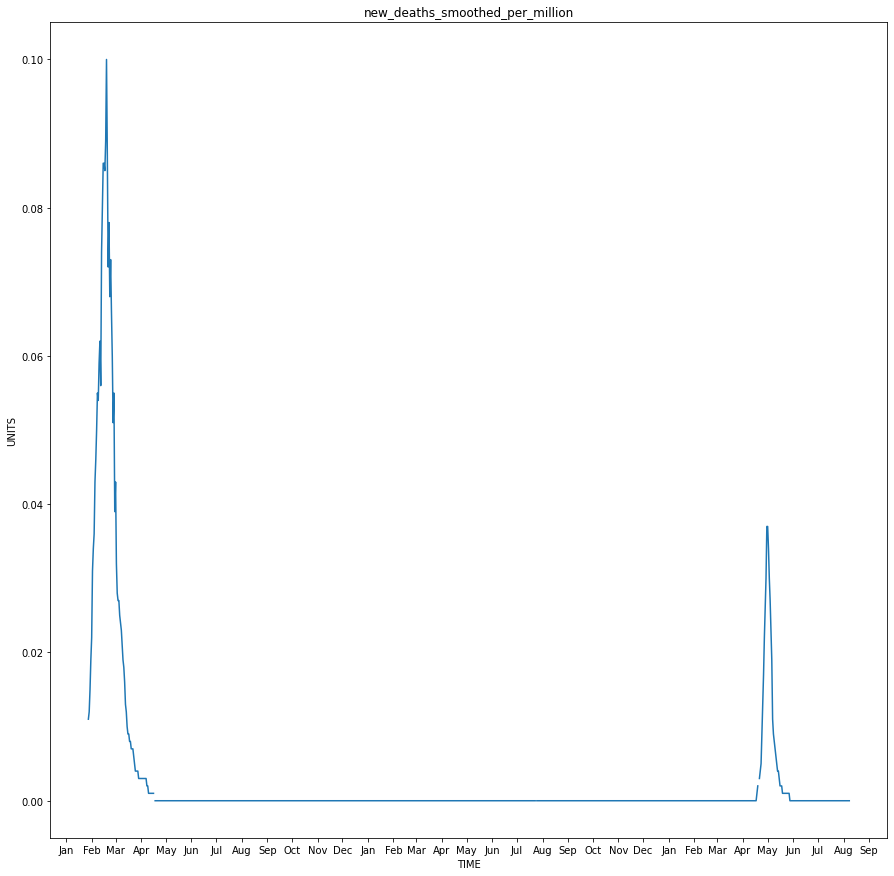

In [274]:
# china
x = china['date']
y = china['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

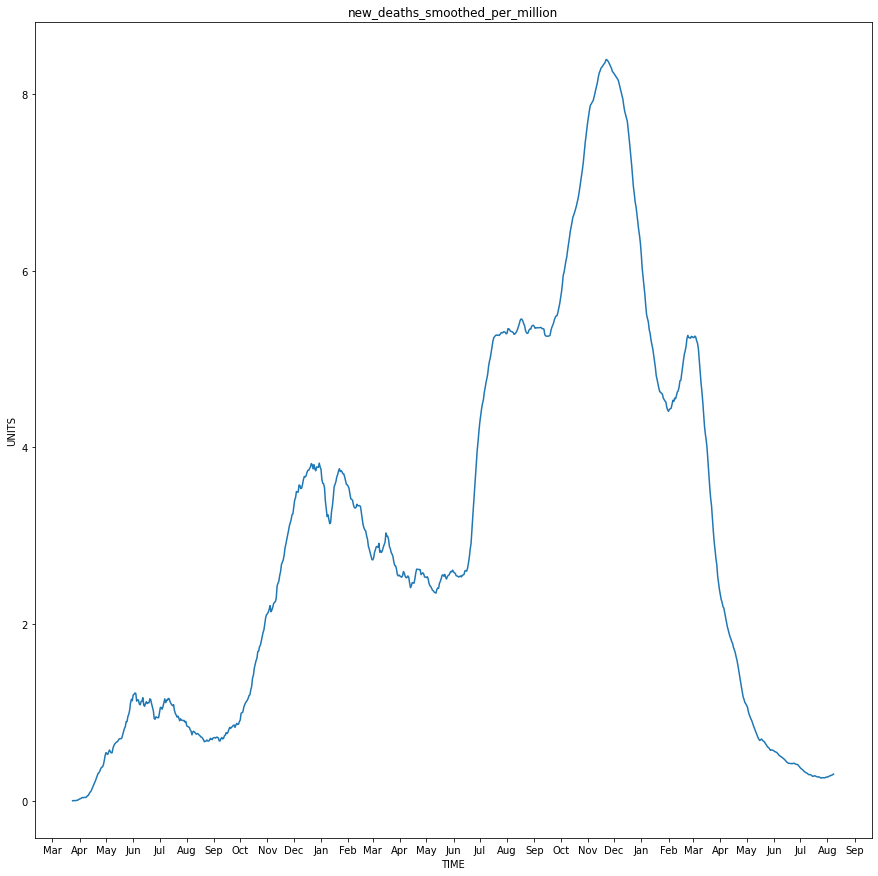

In [275]:
# russia
x = russia['date']
y = russia['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

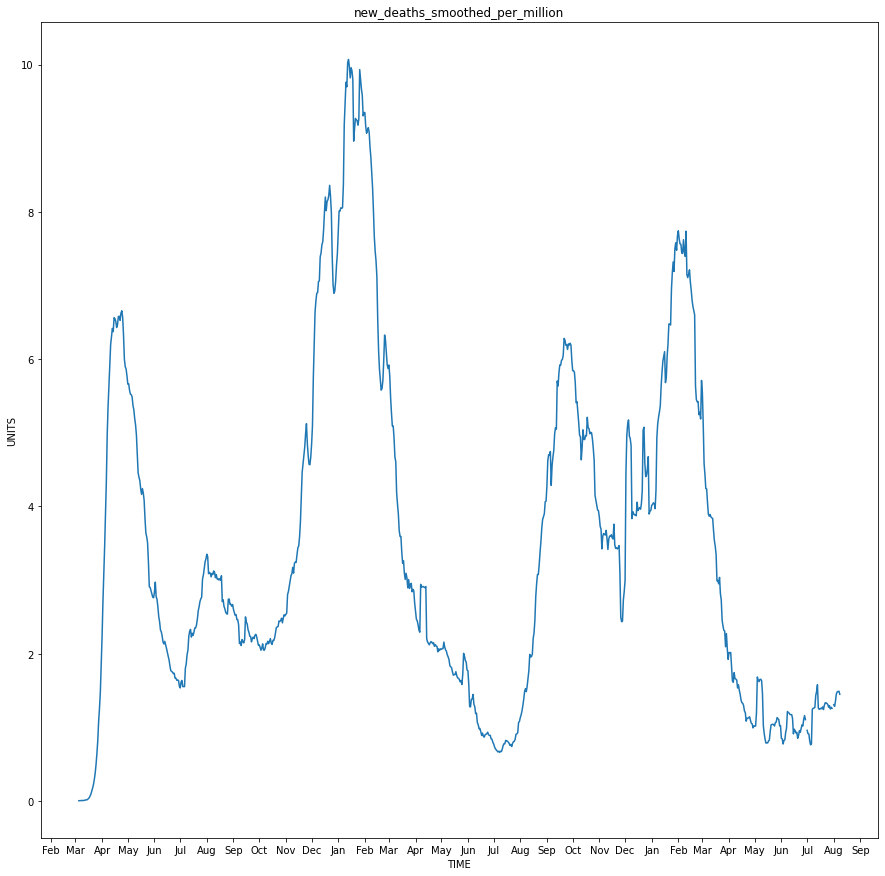

In [276]:
# united_states
x = united_states['date']
y = united_states['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

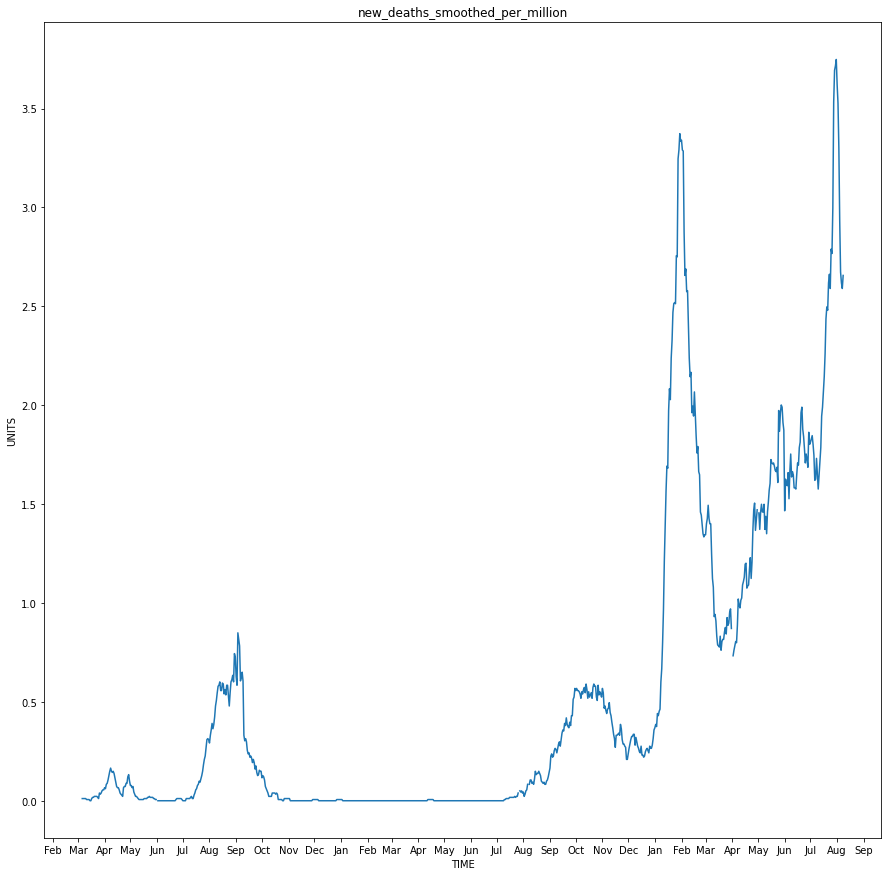

In [278]:
# australia
x = australia['date']
y = australia['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

# PLOT: new cases smoothed

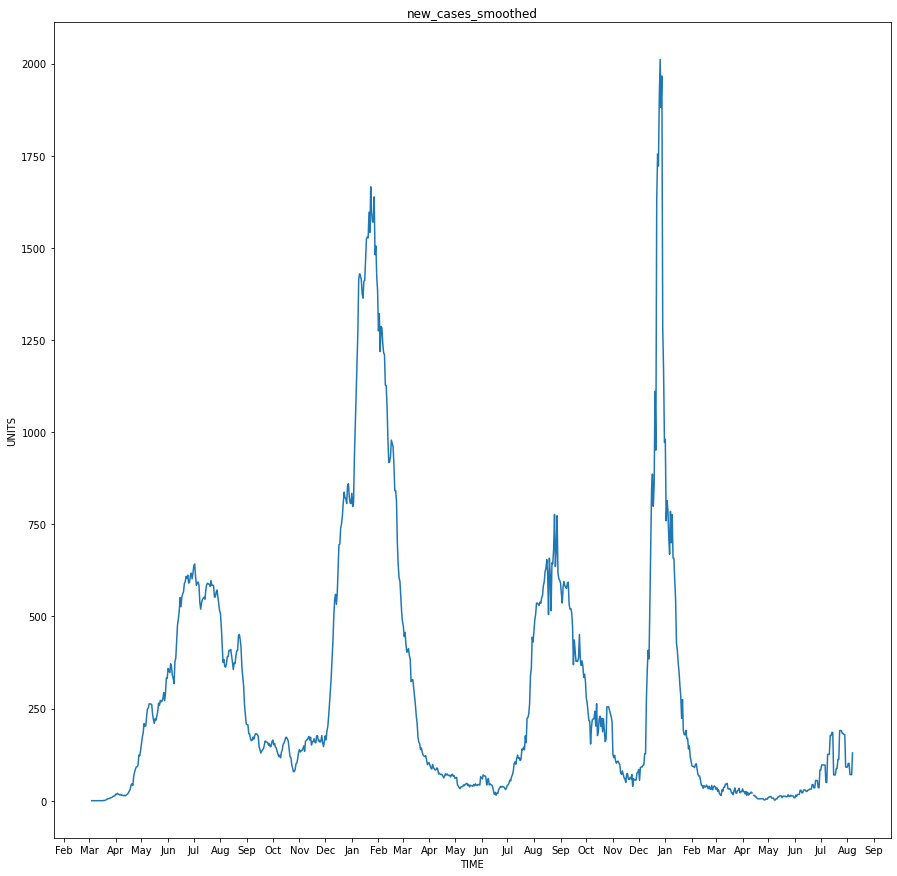

In [279]:
# nigeria
x = nigeria['date']
y = nigeria['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

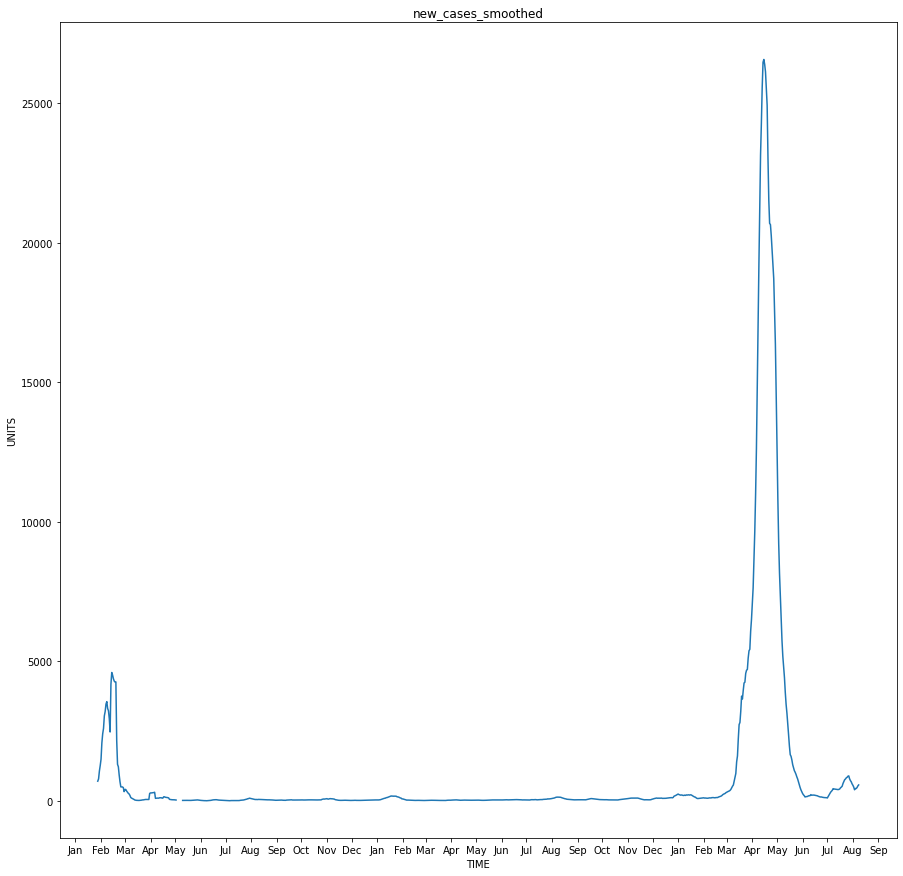

In [280]:
# china
x = china['date']
y = china['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

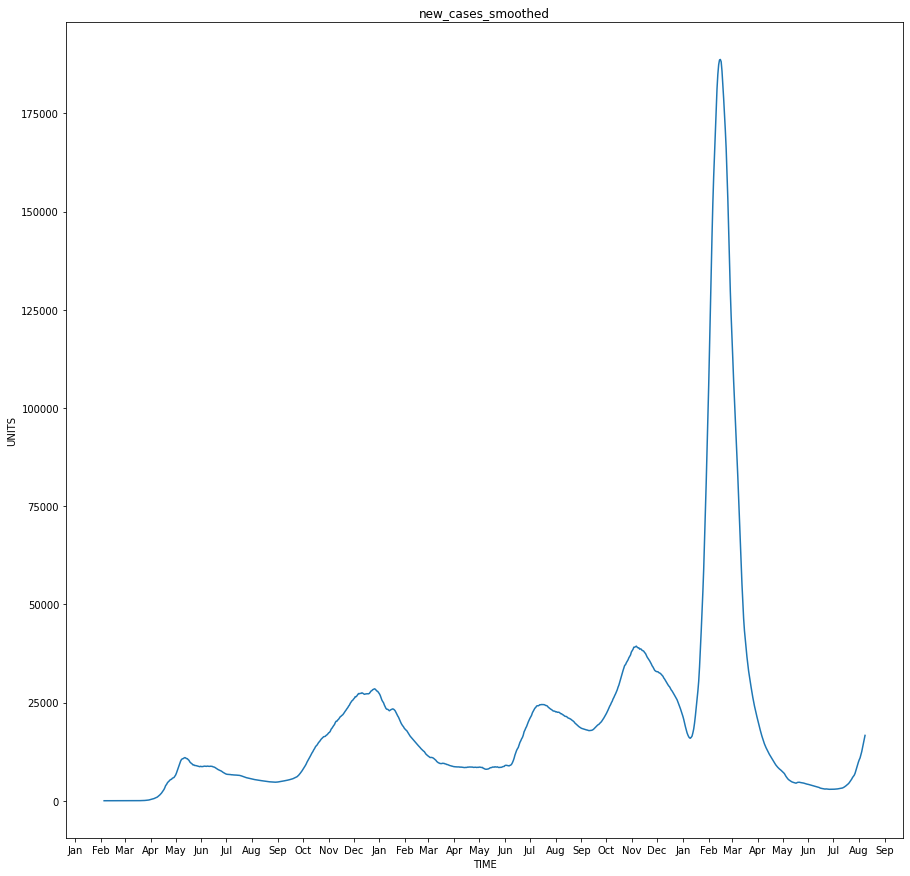

In [281]:
# russia
x = russia['date']
y = russia['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

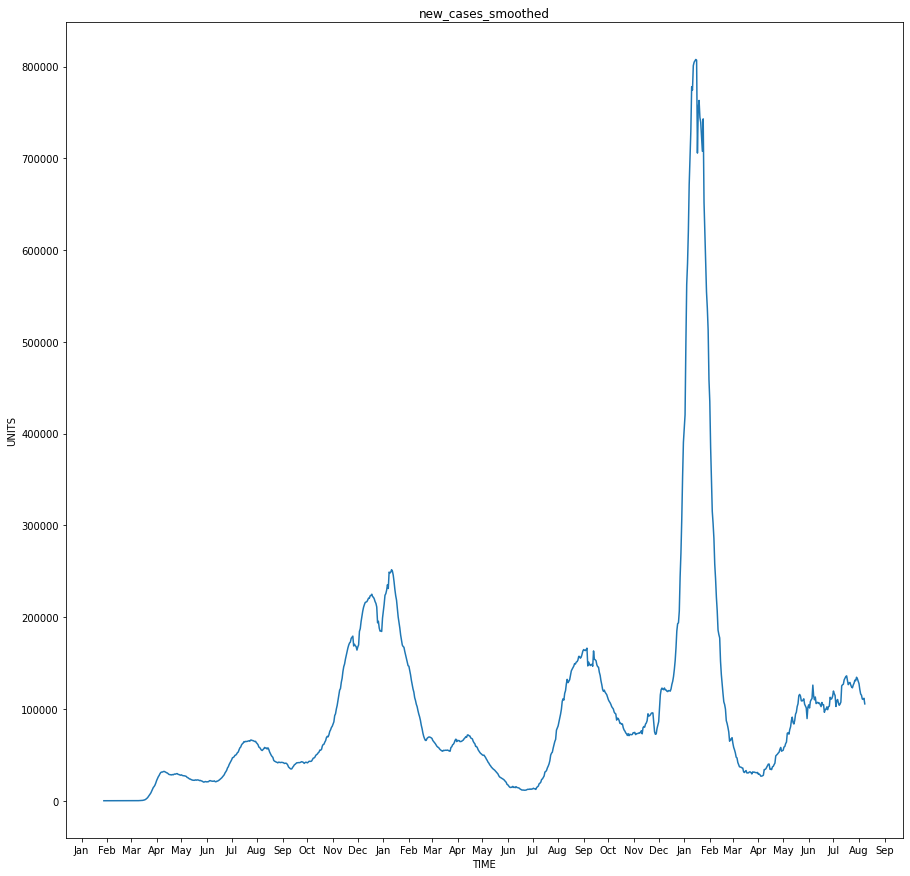

In [282]:
# united_states
x = united_states['date']
y = united_states['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

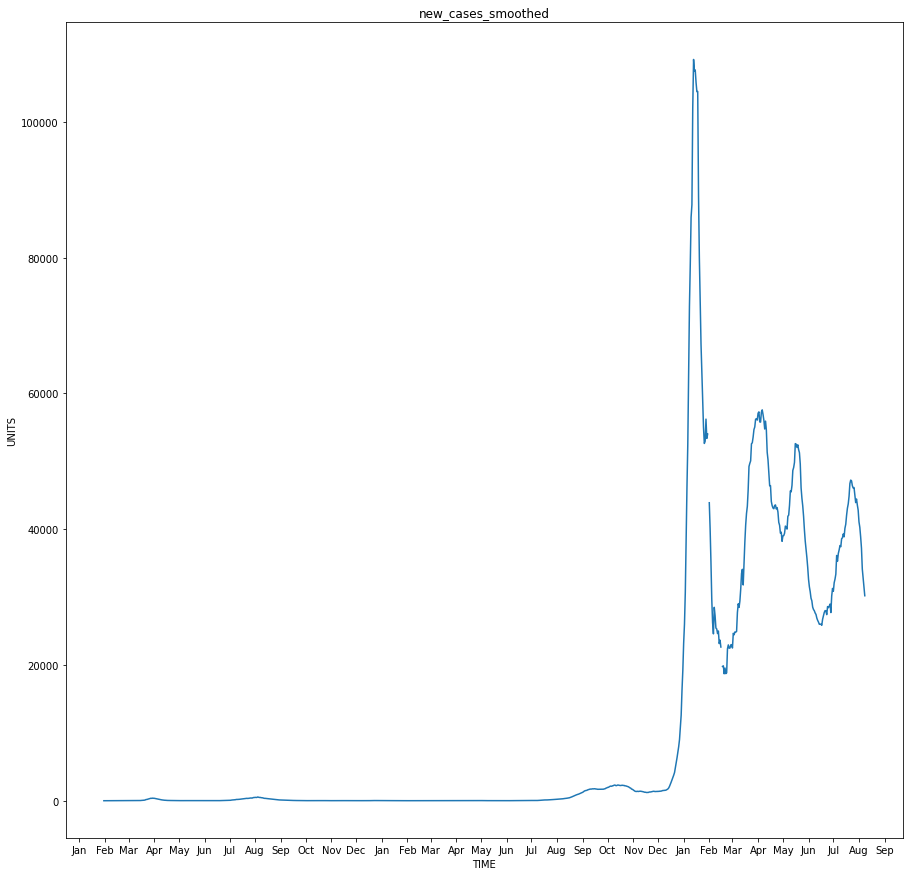

In [284]:
# australia
x = australia['date']
y = australia['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

# PLOT: Both Deaths And Cases On The Same Chart
# -------------------------------------------------------------------------------------------
# Working Out How

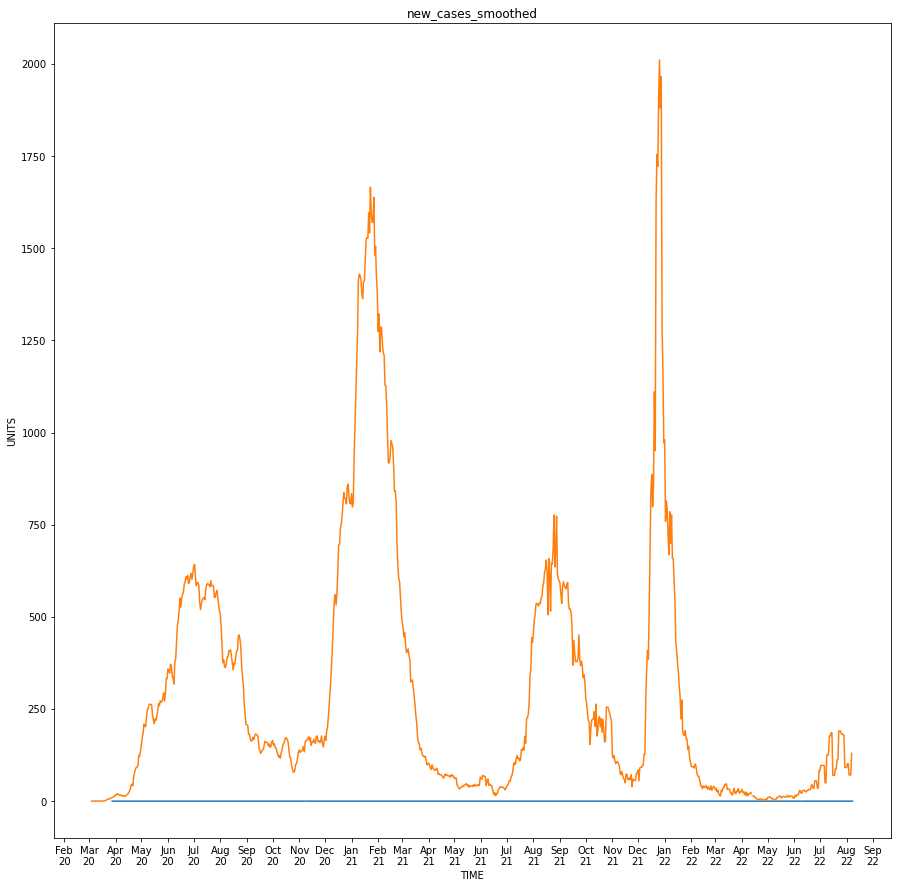

In [285]:
# nigeria
x = nigeria['date']
y = nigeria['new_deaths_smoothed_per_million']
fig, ax = plt.subplots()

ax.plot(x,y)

x = nigeria['date']
y_ncm = nigeria['new_cases_smoothed']

ax.plot(x,y_ncm)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

plt.show()

Text(0, 0.5, 'DEATHS PER MILLION')

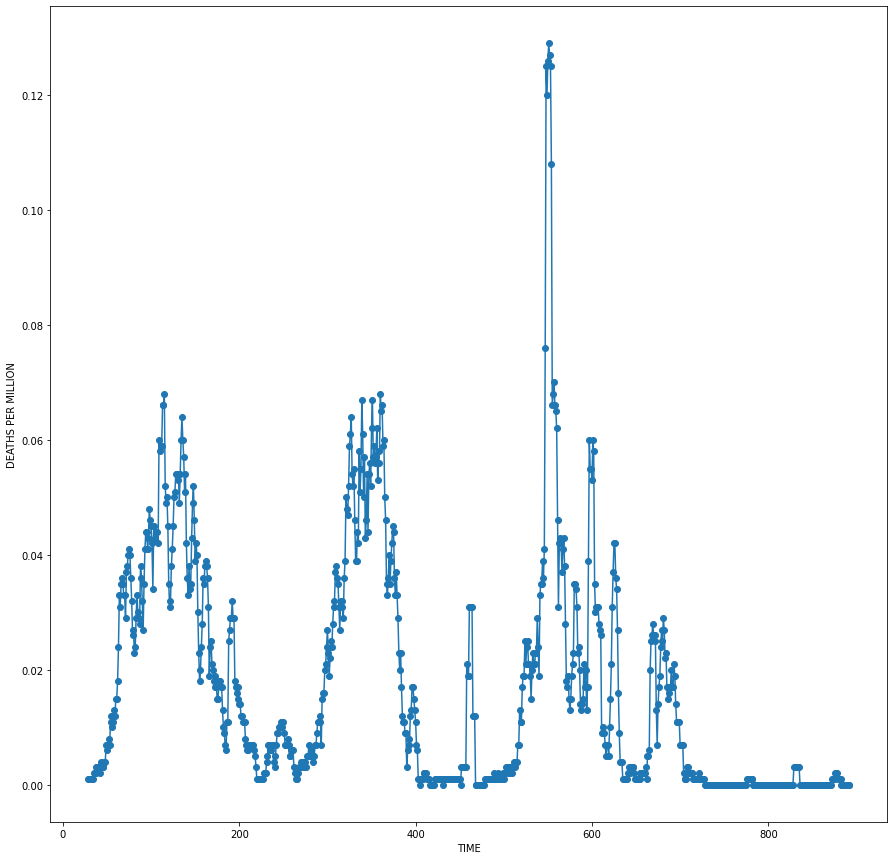

In [286]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

# make a plot
x = range(len(nigeria))
y = nigeria['new_deaths_smoothed_per_million']

ax.plot(x, y, marker = "o")

ax.set_xlabel('TIME')
ax.set_ylabel('DEATHS PER MILLION')

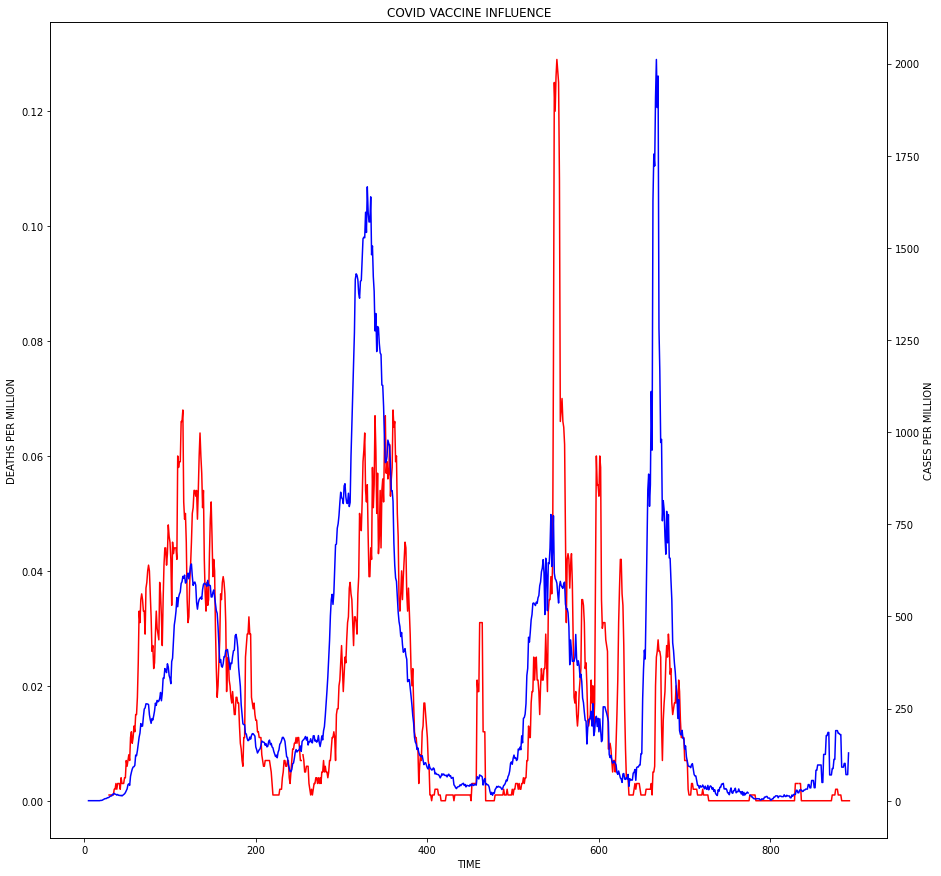

In [287]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

# make a plot
x = range(len(nigeria))
y1 = nigeria['new_deaths_smoothed_per_million']
y2 = nigeria['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
ax1.plot(x, y2, 'b-')

# ax = 'new_deaths_smoothed_per_million'
ax.plot(x, y1, 'r-')

plt.title('COVID VACCINE INFLUENCE')
ax.set_ylabel('DEATHS PER MILLION')
ax.set_xlabel('TIME')
ax1.set_ylabel('CASES PER MILLION')

plt.show()

# -------------------------------------------------------------------------------------------

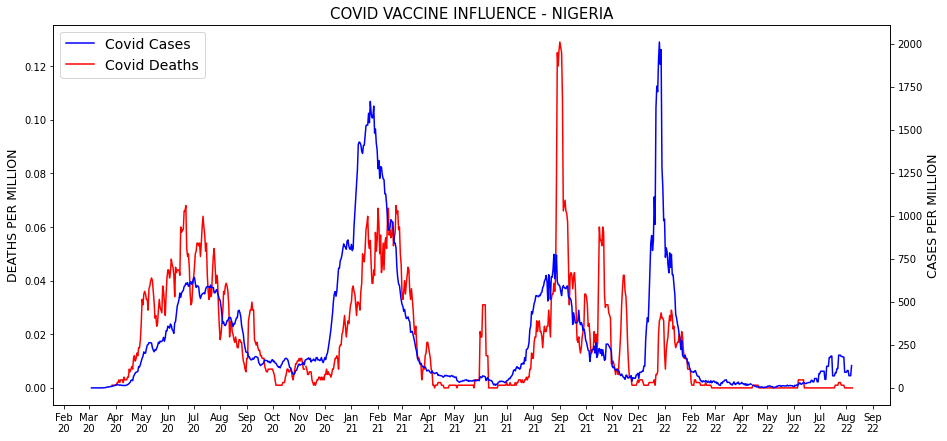

In [288]:
# NIGERIA
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = nigeria['date']
y1 = nigeria['new_deaths_smoothed_per_million']
y2 = nigeria['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - NIGERIA', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - NIGERIA.png')

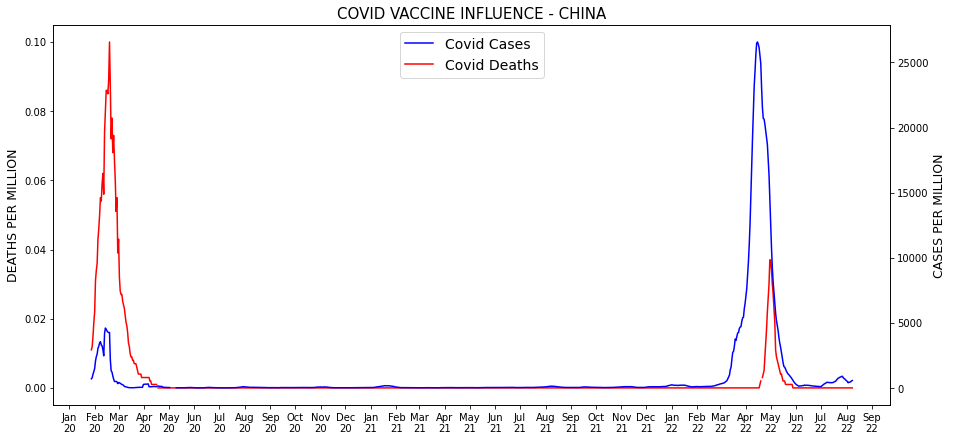

In [289]:
# CHINA
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = china['date']
y1 = china['new_deaths_smoothed_per_million']
y2 = china['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - CHINA', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=9, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - CHINA.png')

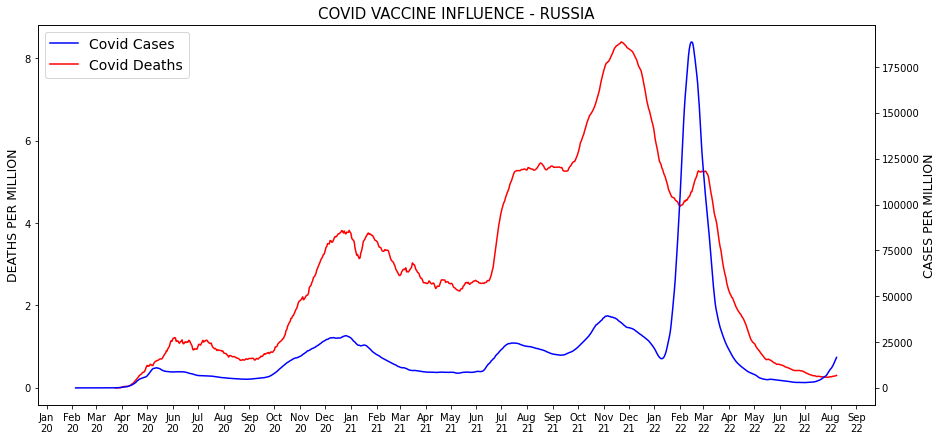

In [290]:
# RUSSIA
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = russia['date']
y1 = russia['new_deaths_smoothed_per_million']
y2 = russia['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - RUSSIA', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - RUSSIA.png')

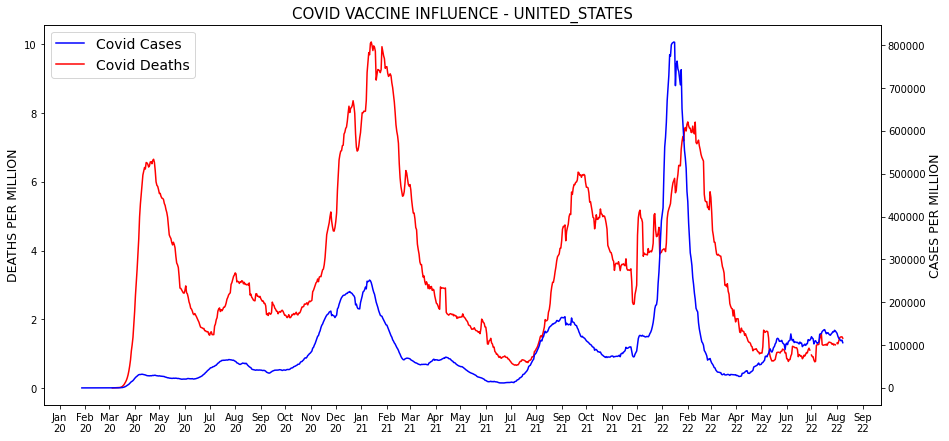

In [291]:
# UNITED_STATES
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = united_states['date']
y1 = united_states['new_deaths_smoothed_per_million']
y2 = united_states['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - UNITED_STATES', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - UNITED STATES.png')

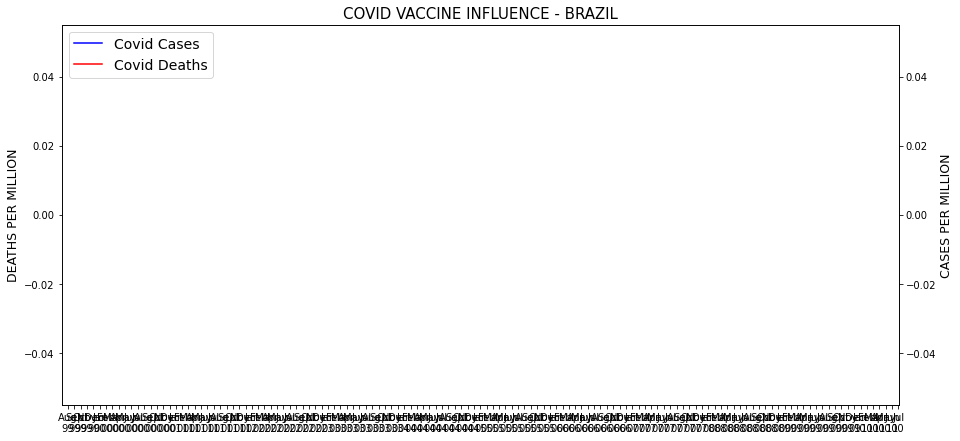

In [292]:
# BRAZIL
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = brazil['date']
y1 = brazil['new_deaths_smoothed_per_million']
y2 = brazil['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - BRAZIL', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - BRAZIL.png')

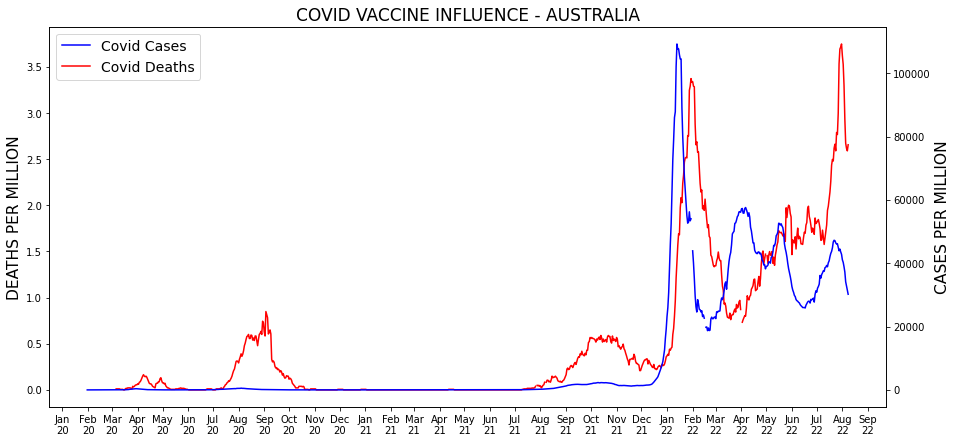

In [293]:
# AUSTRALIA
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = australia['date']
y1 = australia['new_deaths_smoothed_per_million']
y2 = australia['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - AUSTRALIA', fontsize = 17)
ax1.set_ylabel('CASES PER MILLION', fontsize = 15.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 15.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - AUSTRALIA.png')

# Observed in Nigeria and the United States, post vaccine trend clusters for covid cases and covid mortality did not replicate the trends height observed prior to vaccine availably.
# Contrary to what was observed however, Nigeria presented a pair of sharp vertical movements for covid deaths in September 2021, and a similar movement for covid cases through December 2020 -January 2021.